In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy as sp
import scipy.fftpack
from scipy.fft import fft, fftfreq
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('DATA_EMG.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686525 entries, 0 to 686524
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Time                              686525 non-null  float64
 1   Right Rectus femoris              686525 non-null  float64
 2   Left Gluteus maximus              686525 non-null  float64
 3   Left Gastrocnemius medialis       686525 non-null  float64
 4   Left Semitendinosus               686525 non-null  float64
 5   Left Biceps femoris caput longus  686525 non-null  float64
 6   Right Vastus medialis             686525 non-null  float64
 7   Right Tibialis anterior           686525 non-null  float64
 8   Left Gastrocnemius lateralis      686525 non-null  float64
 9   Target                            686525 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 52.4 MB


In [5]:
data = df.to_numpy()
print(data)

[[ 0.00000000e+00 -2.63818818e-04 -1.47328377e-05 ...  2.66927952e-04
  -2.35988734e-04  0.00000000e+00]
 [ 1.00000000e-03 -1.00158903e-03 -4.49868710e-05 ...  1.23355070e-03
  -1.10751512e-03  0.00000000e+00]
 [ 2.00000000e-03 -2.17330904e-03 -3.41254513e-05 ...  3.45659445e-03
  -3.27739424e-03  0.00000000e+00]
 ...
 [ 6.86522000e+02  9.09139666e-03  1.18928713e-03 ... -2.82557058e-02
  -3.96933518e-02  2.00000000e+00]
 [ 6.86523000e+02  5.96566484e-03  3.52961074e-03 ... -6.79062045e-03
  -6.18686811e-03  2.00000000e+00]
 [ 6.86524000e+02  5.06237659e-04  5.30334888e-03 ...  1.03695864e-02
   3.23634540e-02  2.00000000e+00]]


In [30]:
data[:,-1] = [1 if x == 2 else x for x in data[:,-1]]
columns = ['Time', 'Right Rectus Femoris', 'Left Gluteus Maximus', 'Left Gastrocnemius Medialis', 'Left Semitendinosus', 'Left Biceps Femoris Caput Longus', 'Right Vastus Medialis', 'Right Tibialis Anterior', 'Left Gastrocnemius Lateralis', 'Target']
data_df = pd.DataFrame(data, columns=columns)

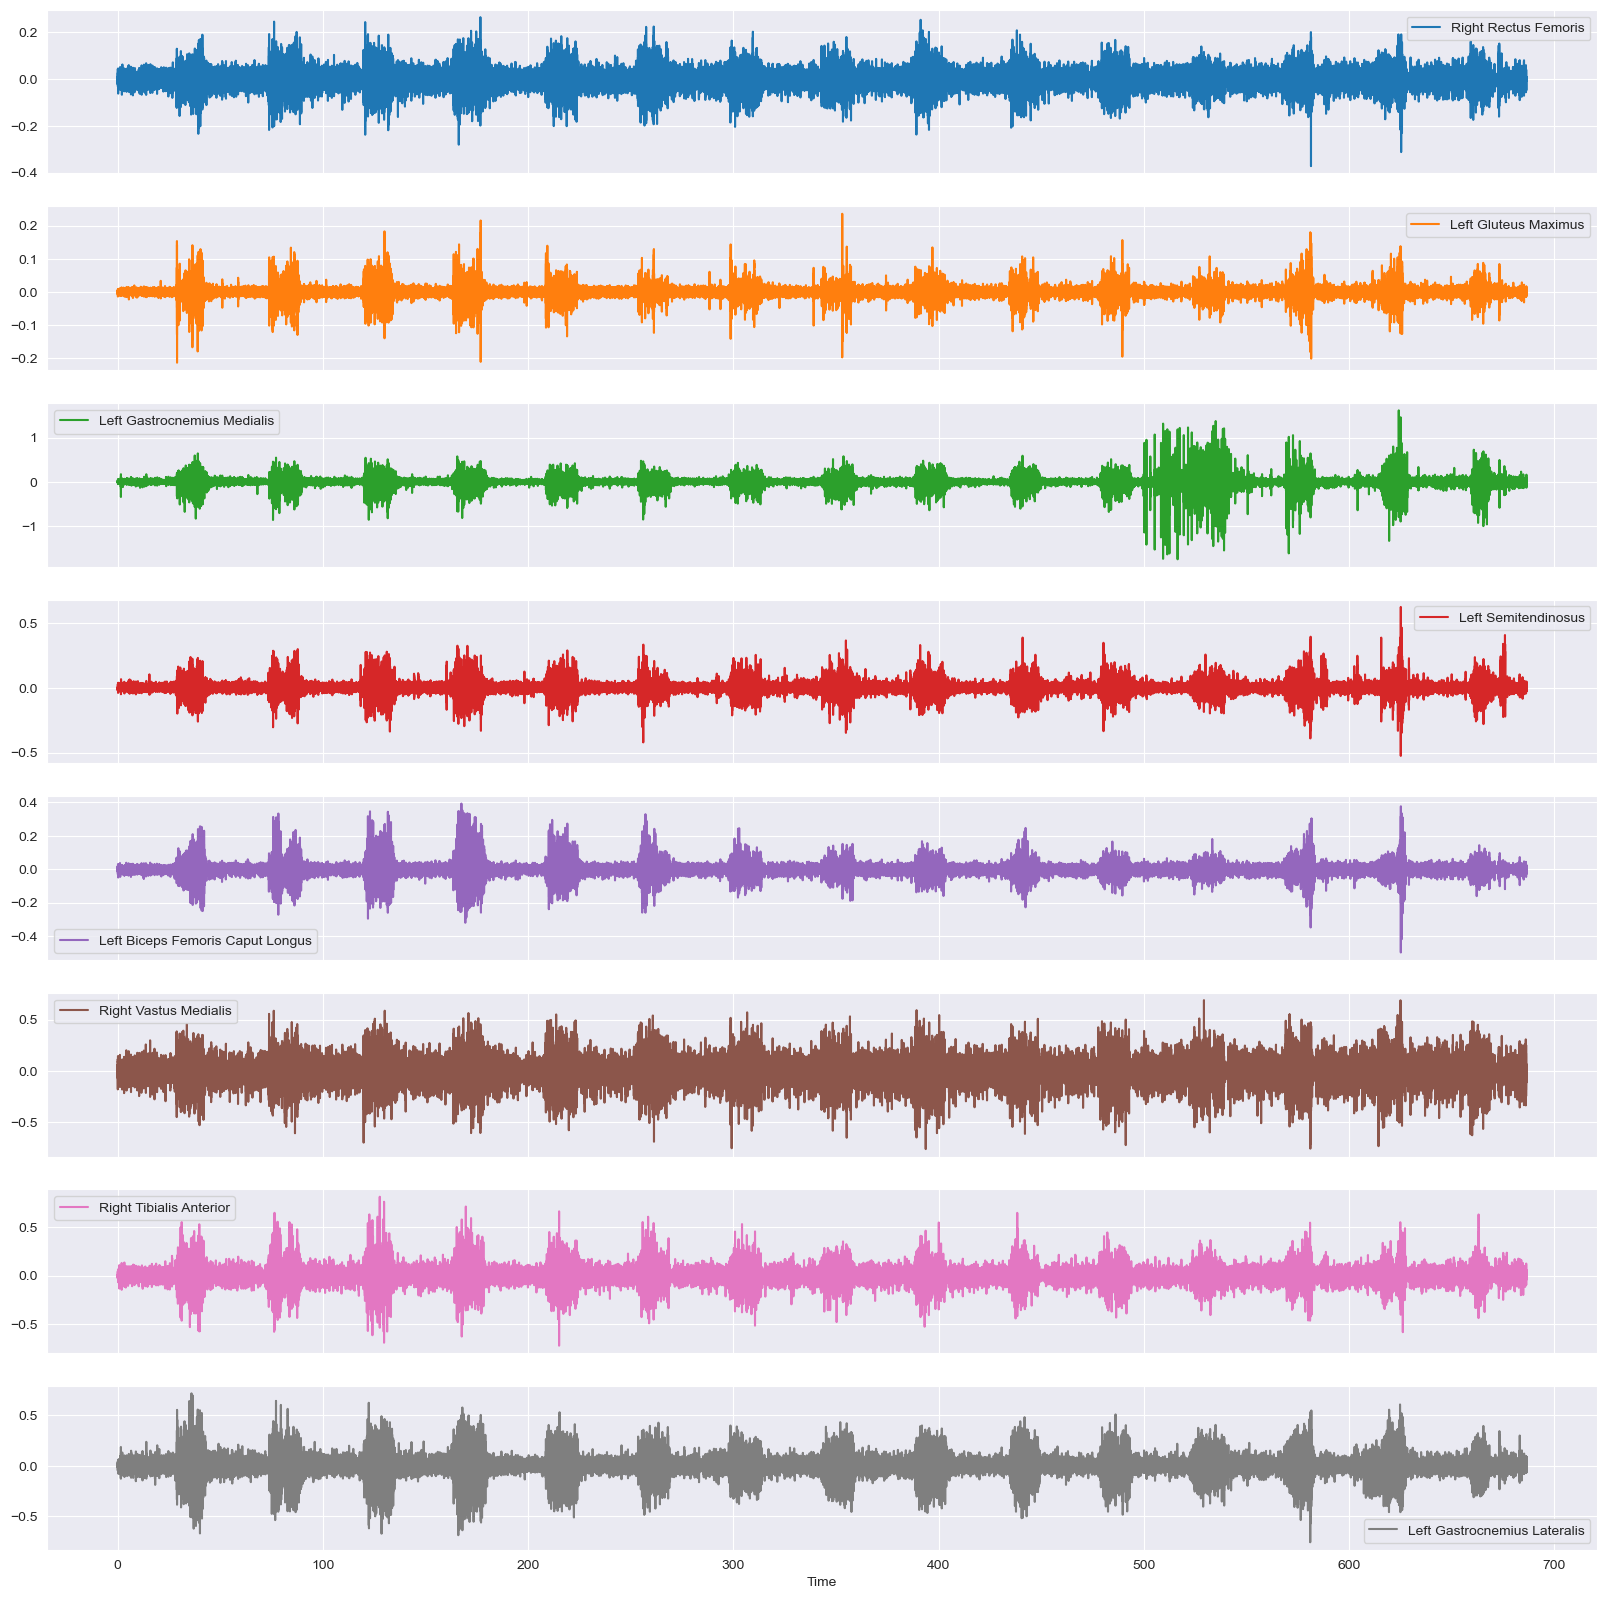

In [31]:
data_df.plot(x='Time', y=['Right Rectus Femoris', 'Left Gluteus Maximus', 'Left Gastrocnemius Medialis', 'Left Semitendinosus', 'Left Biceps Femoris Caput Longus', 'Right Vastus Medialis', 'Right Tibialis Anterior', 'Left Gastrocnemius Lateralis'], kind = 'line', figsize = (20,20), subplots=True)
plt.show()

In [64]:
freq = 1000

if len(data_df)/freq != len(data_df)//freq:
    cant_vent = len(data_df)//freq + 1
else:
    cant_vent = len(data_df)//freq

def sign_mean():
    global df_mean
    ventana = np.zeros((cant_vent, 10))
    Dataset_2=np.array(data_df)
    Dato=np.zeros((cant_vent, 10))
    for i in range (0, cant_vent):
        ventana= Dataset_2[(i * freq):((i * freq) + freq), :]
        Dato[i]=np.mean(ventana, axis=0)
    columns_mean = ['Time (mean)', 'Right Rectus Femoris (Mean)', 'Left Gluteus Maximus(Mean)' , 'Left Gastrocnemius Medialis (Mean)', 'Left Semitendinosus (Mean)', 'Left Biceps Femoris Caput Longus (Mean)', 'Right Vastus Medialis (Mean)', 'Right Tibialis Anterior (Mean)', 'Left Gastrocnemius Lateralis (Mean)', 'Target']
    df_mean = pd.DataFrame(Dato, columns=columns_mean)
    return (df_mean)

def sign_median():
    global df_median
    ventana = np.zeros((cant_vent, 10))
    Dataset_2=np.array(data_df)
    Dato=np.zeros((cant_vent, 10))
    for i in range (0, cant_vent):
        ventana= Dataset_2[(i * freq):((i * freq) + freq), :]
        Dato[i]=np.median(ventana, axis=0)
    columns_median = ['Time (Median)', 'Right Rectus Femoris (Median)', 'Left Gluteus Maximus(Median)' , 'Left Gastrocnemius Medialis (Median)', 'Left Semitendinosus (Median)', 'Left Biceps Femoris Caput Longus (Median)', 'Right Vastus Medialis (Median)', 'Right Tibialis Anterior (Median)', 'Left Gastrocnemius Lateralis (Median)', 'Target']
    df_median = pd.DataFrame(Dato, columns=columns_median)
    return (df_median)

def sign_std():
    global df_std
    ventana = np.zeros((cant_vent, 10))
    Dataset_2=np.array(data_df)
    Dato=np.zeros((cant_vent, 10))
    for i in range (0, cant_vent):
        ventana= Dataset_2[(i * freq):((i * freq) + freq), :]
        Dato[i]=np.median(ventana, axis=0)
    columns_std = ['Time (std)', 'Right Rectus Femoris (std)', 'Left Gluteus Maximus(std)' , 'Left Gastrocnemius Medialis (std)', 'Left Semitendinosus (std)', 'Left Biceps Femoris Caput Longus (std)', 'Right Vastus Medialis (std)', 'Right Tibialis Anterior (std)', 'Left Gastrocnemius Lateralis (std)', 'Target']
    df_std = pd.DataFrame(Dato, columns=columns_std)
    return (df_std)

def sign_cov():
    global df_cov
    ventana = np.zeros((cant_vent, 10))
    Dataset_2=np.array(data_df)
    Dato=np.zeros((cant_vent, 10))
    for i in range (0, cant_vent):
        ventana= Dataset_2[(i * freq):((i * freq) + freq), :]
        Dato[i]=np.median(ventana, axis=0)
    columns_cov = ['Time (Cov)', 'Right Rectus Femoris (Cov)', 'Left Gluteus Maximus(Cov)' , 'Left Gastrocnemius Medialis (Cov)', 'Left Semitendinosus (Cov)', 'Left Biceps Femoris Caput Longus (Cov)', 'Right Vastus Medialis (Cov)', 'Right Tibialis Anterior (Cov)', 'Left Gastrocnemius Lateralis (Cov)', 'Target']
    df_cov = pd.DataFrame(Dato, columns=columns_cov)
    return (df_cov)

def sign_var():
    global df_var
    ventana = np.zeros((cant_vent, 10))
    Dataset_2=np.array(data_df)
    Dato=np.zeros((cant_vent, 10))
    for i in range (0, cant_vent):
        ventana= Dataset_2[(i * freq):((i * freq) + freq), :]
        Dato[i]=np.median(ventana, axis=0)
    columns_var = ['Time (var)', 'Right Rectus Femoris (var)', 'Left Gluteus Maximus(var)' , 'Left Gastrocnemius Medialis (var)', 'Left Semitendinosus (var)', 'Left Biceps Femoris Caput Longus (var)', 'Right Vastus Medialis (var)', 'Right Tibialis Anterior (var)', 'Left Gastrocnemius Lateralis (var)', 'Target']
    df_var = pd.DataFrame(Dato, columns=columns_var)
    return (df_var)

sign_mean()
sign_median()
sign_var()
sign_std()
sign_cov()

Time (Cov)  Right Rectus Femoris (Cov)  Left Gluteus Maximus(Cov)  \
0        0.4995                    0.000211                   0.000084   
1        1.4995                   -0.000923                   0.000247   
2        2.4995                    0.000710                  -0.000113   
3        3.4995                    0.000738                   0.000178   
4        4.4995                   -0.000819                   0.000169   
..          ...                         ...                        ...   
682    682.4995                   -0.000091                  -0.000045   
683    683.4995                    0.000787                  -0.000073   
684    684.4995                    0.000317                   0.000124   
685    685.4995                    0.000024                   0.000173   
686    686.2620                    0.000641                  -0.000096   

     Left Gastrocnemius Medialis (Cov)  Left Semitendinosus (Cov)  \
0                             0.000309                  -0.000293   
1                            -0.000640                  -0.000808   
2                            -0.000502                  -0.000916   
3                            -0.000014                  -0.000391   
4                             0.000026                  -0.000796   
..                                 ...                        ...   
682                           0.000179                  -0.000602   
683                          -0.001836                  -0.001241   
684                          -0.001723                  -0.001218   
685                           0.000070                  -0.000232   
686                           0.000616                  -0.000923   

     Left Biceps Femoris Caput Longus (Cov)  Right Vastus Medialis (Cov)  \
0                                  0.000041                    -0.000549   
1                                  0.000170                     0.000312   
2                                 -0.000154                    -0.000319   
3                                  0.000349                    -0.000498   
4                                  0.000105                    -0.000315   
..                                      ...                          ...   
682                               -0.000067                    -0.000235   
683                                0.000523                    -0.000375   
684                               -0.000228                    -0.000236   
685                                0.000002                    -0.000295   
686                                0.000696                    -0.000214   

     Right Tibialis Anterior (Cov)  Left Gastrocnemius Lateralis (Cov)  Target  
0                    -6.351310e-04                            0.001065     0.0  
1                     9.169532e-07                           -0.001120     0.0  
2                     2.244293e-05                            0.000035     0.0  
3                    -7.505656e-04                            0.000321     0.0  
4                     2.196193e-04                            0.000581     0.0  
..                             ...                                 ...     ...  
682                  -7.957807e-04                           -0.000881     1.0  
683                  -9.689218e-04                           -0.000743     1.0  
684                  -5.159327e-04                           -0.000637     1.0  
685                   1.782979e-04                           -0.000019     1.0  
686                  -1.293587e-04                           -0.000750     1.0  

[687 rows x 10 columns]

In [53]:
df_mean.head()

Time (mean)  Right Rectus Femoris (Mean)  Left Gluteus Maximus(Mean)  \
0       0.4995                     0.000045                    0.000019   
1       1.4995                    -0.000045                   -0.000002   
2       2.4995                     0.000136                    0.000001   
3       3.4995                     0.000080                    0.000002   
4       4.4995                    -0.000375                   -0.000022   

   Left Gastrocnemius Medialis (Mean)  Left Semitendinosus (Mean)  \
0                           -0.000080                    0.000058   
1                            0.000053                   -0.000014   
2                            0.000276                   -0.000027   
3                           -0.000374                   -0.000012   
4                            0.000177                    0.000042   

   Left Biceps Femoris Caput Longus (Mean)  Right Vastus Medialis (Mean)  \
0                                 0.000043                     -0.000021   
1                                 0.000021                      0.000021   
2                                -0.000051                     -0.000115   
3                                -0.000050                     -0.000027   
4                                 0.000037                      0.000161   

   Right Tibialis Anterior (Mean)  Left Gastrocnemius Lateralis (Mean)  Target  
0                       -0.000028                             0.000211     0.0  
1                       -0.000068                            -0.000340     0.0  
2                        0.000052                             0.000093     0.0  
3                       -0.000069                            -0.000227     0.0  
4                        0.000130                            -0.000022     0.0

In [54]:
df_median.head()

Time (Median)  Right Rectus Femoris (Median)  Left Gluteus Maximus(Median)  \
0         0.4995                       0.000211                      0.000084   
1         1.4995                      -0.000923                      0.000247   
2         2.4995                       0.000710                     -0.000113   
3         3.4995                       0.000738                      0.000178   
4         4.4995                      -0.000819                      0.000169   

   Left Gastrocnemius Medialis (Median)  Left Semitendinosus (Median)  \
0                              0.000309                     -0.000293   
1                             -0.000640                     -0.000808   
2                             -0.000502                     -0.000916   
3                             -0.000014                     -0.000391   
4                              0.000026                     -0.000796   

   Left Biceps Femoris Caput Longus (Median)  Right Vastus Medialis (Median)  \
0                                   0.000041                       -0.000549   
1                                   0.000170                        0.000312   
2                                  -0.000154                       -0.000319   
3                                   0.000349                       -0.000498   
4                                   0.000105                       -0.000315   

   Right Tibialis Anterior (Median)  Left Gastrocnemius Lateralis (Median)  \
0                     -6.351310e-04                               0.001065   
1                      9.169532e-07                              -0.001120   
2                      2.244293e-05                               0.000035   
3                     -7.505656e-04                               0.000321   
4                      2.196193e-04                               0.000581   

   Target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [55]:
df_var.head()

Time (var)  Right Rectus Femoris (var)  Left Gluteus Maximus(var)  \
0      0.4995                    0.000211                   0.000084   
1      1.4995                   -0.000923                   0.000247   
2      2.4995                    0.000710                  -0.000113   
3      3.4995                    0.000738                   0.000178   
4      4.4995                   -0.000819                   0.000169   

   Left Gastrocnemius Medialis (var)  Left Semitendinosus (var)  \
0                           0.000309                  -0.000293   
1                          -0.000640                  -0.000808   
2                          -0.000502                  -0.000916   
3                          -0.000014                  -0.000391   
4                           0.000026                  -0.000796   

   Left Biceps Femoris Caput Longus (var)  Right Vastus Medialis (var)  \
0                                0.000041                    -0.000549   
1                                0.000170                     0.000312   
2                               -0.000154                    -0.000319   
3                                0.000349                    -0.000498   
4                                0.000105                    -0.000315   

   Right Tibialis Anterior (var)  Left Gastrocnemius Lateralis (var)  Target  
0                  -6.351310e-04                            0.001065     0.0  
1                   9.169532e-07                           -0.001120     0.0  
2                   2.244293e-05                            0.000035     0.0  
3                  -7.505656e-04                            0.000321     0.0  
4                   2.196193e-04                            0.000581     0.0

In [56]:
df_std.head()

Time (std)  Right Rectus Femoris (std)  Left Gluteus Maximus(std)  \
0      0.4995                    0.000211                   0.000084   
1      1.4995                   -0.000923                   0.000247   
2      2.4995                    0.000710                  -0.000113   
3      3.4995                    0.000738                   0.000178   
4      4.4995                   -0.000819                   0.000169   

   Left Gastrocnemius Medialis (std)  Left Semitendinosus (std)  \
0                           0.000309                  -0.000293   
1                          -0.000640                  -0.000808   
2                          -0.000502                  -0.000916   
3                          -0.000014                  -0.000391   
4                           0.000026                  -0.000796   

   Left Biceps Femoris Caput Longus (std)  Right Vastus Medialis (std)  \
0                                0.000041                    -0.000549   
1                                0.000170                     0.000312   
2                               -0.000154                    -0.000319   
3                                0.000349                    -0.000498   
4                                0.000105                    -0.000315   

   Right Tibialis Anterior (std)  Left Gastrocnemius Lateralis (std)  Target  
0                  -6.351310e-04                            0.001065     0.0  
1                   9.169532e-07                           -0.001120     0.0  
2                   2.244293e-05                            0.000035     0.0  
3                  -7.505656e-04                            0.000321     0.0  
4                   2.196193e-04                            0.000581     0.0

In [57]:
df_cov.head()

Time (Cov)  Right Rectus Femoris (Cov)  Left Gluteus Maximus(Cov)  \
0      0.4995                    0.000211                   0.000084   
1      1.4995                   -0.000923                   0.000247   
2      2.4995                    0.000710                  -0.000113   
3      3.4995                    0.000738                   0.000178   
4      4.4995                   -0.000819                   0.000169   

   Left Gastrocnemius Medialis (Cov)  Left Semitendinosus (Cov)  \
0                           0.000309                  -0.000293   
1                          -0.000640                  -0.000808   
2                          -0.000502                  -0.000916   
3                          -0.000014                  -0.000391   
4                           0.000026                  -0.000796   

   Left Biceps Femoris Caput Longus (Cov)  Right Vastus Medialis (Cov)  \
0                                0.000041                    -0.000549   
1                                0.000170                     0.000312   
2                               -0.000154                    -0.000319   
3                                0.000349                    -0.000498   
4                                0.000105                    -0.000315   

   Right Tibialis Anterior (Cov)  Left Gastrocnemius Lateralis (Cov)  Target  
0                  -6.351310e-04                            0.001065     0.0  
1                   9.169532e-07                           -0.001120     0.0  
2                   2.244293e-05                            0.000035     0.0  
3                  -7.505656e-04                            0.000321     0.0  
4                   2.196193e-04                            0.000581     0.0

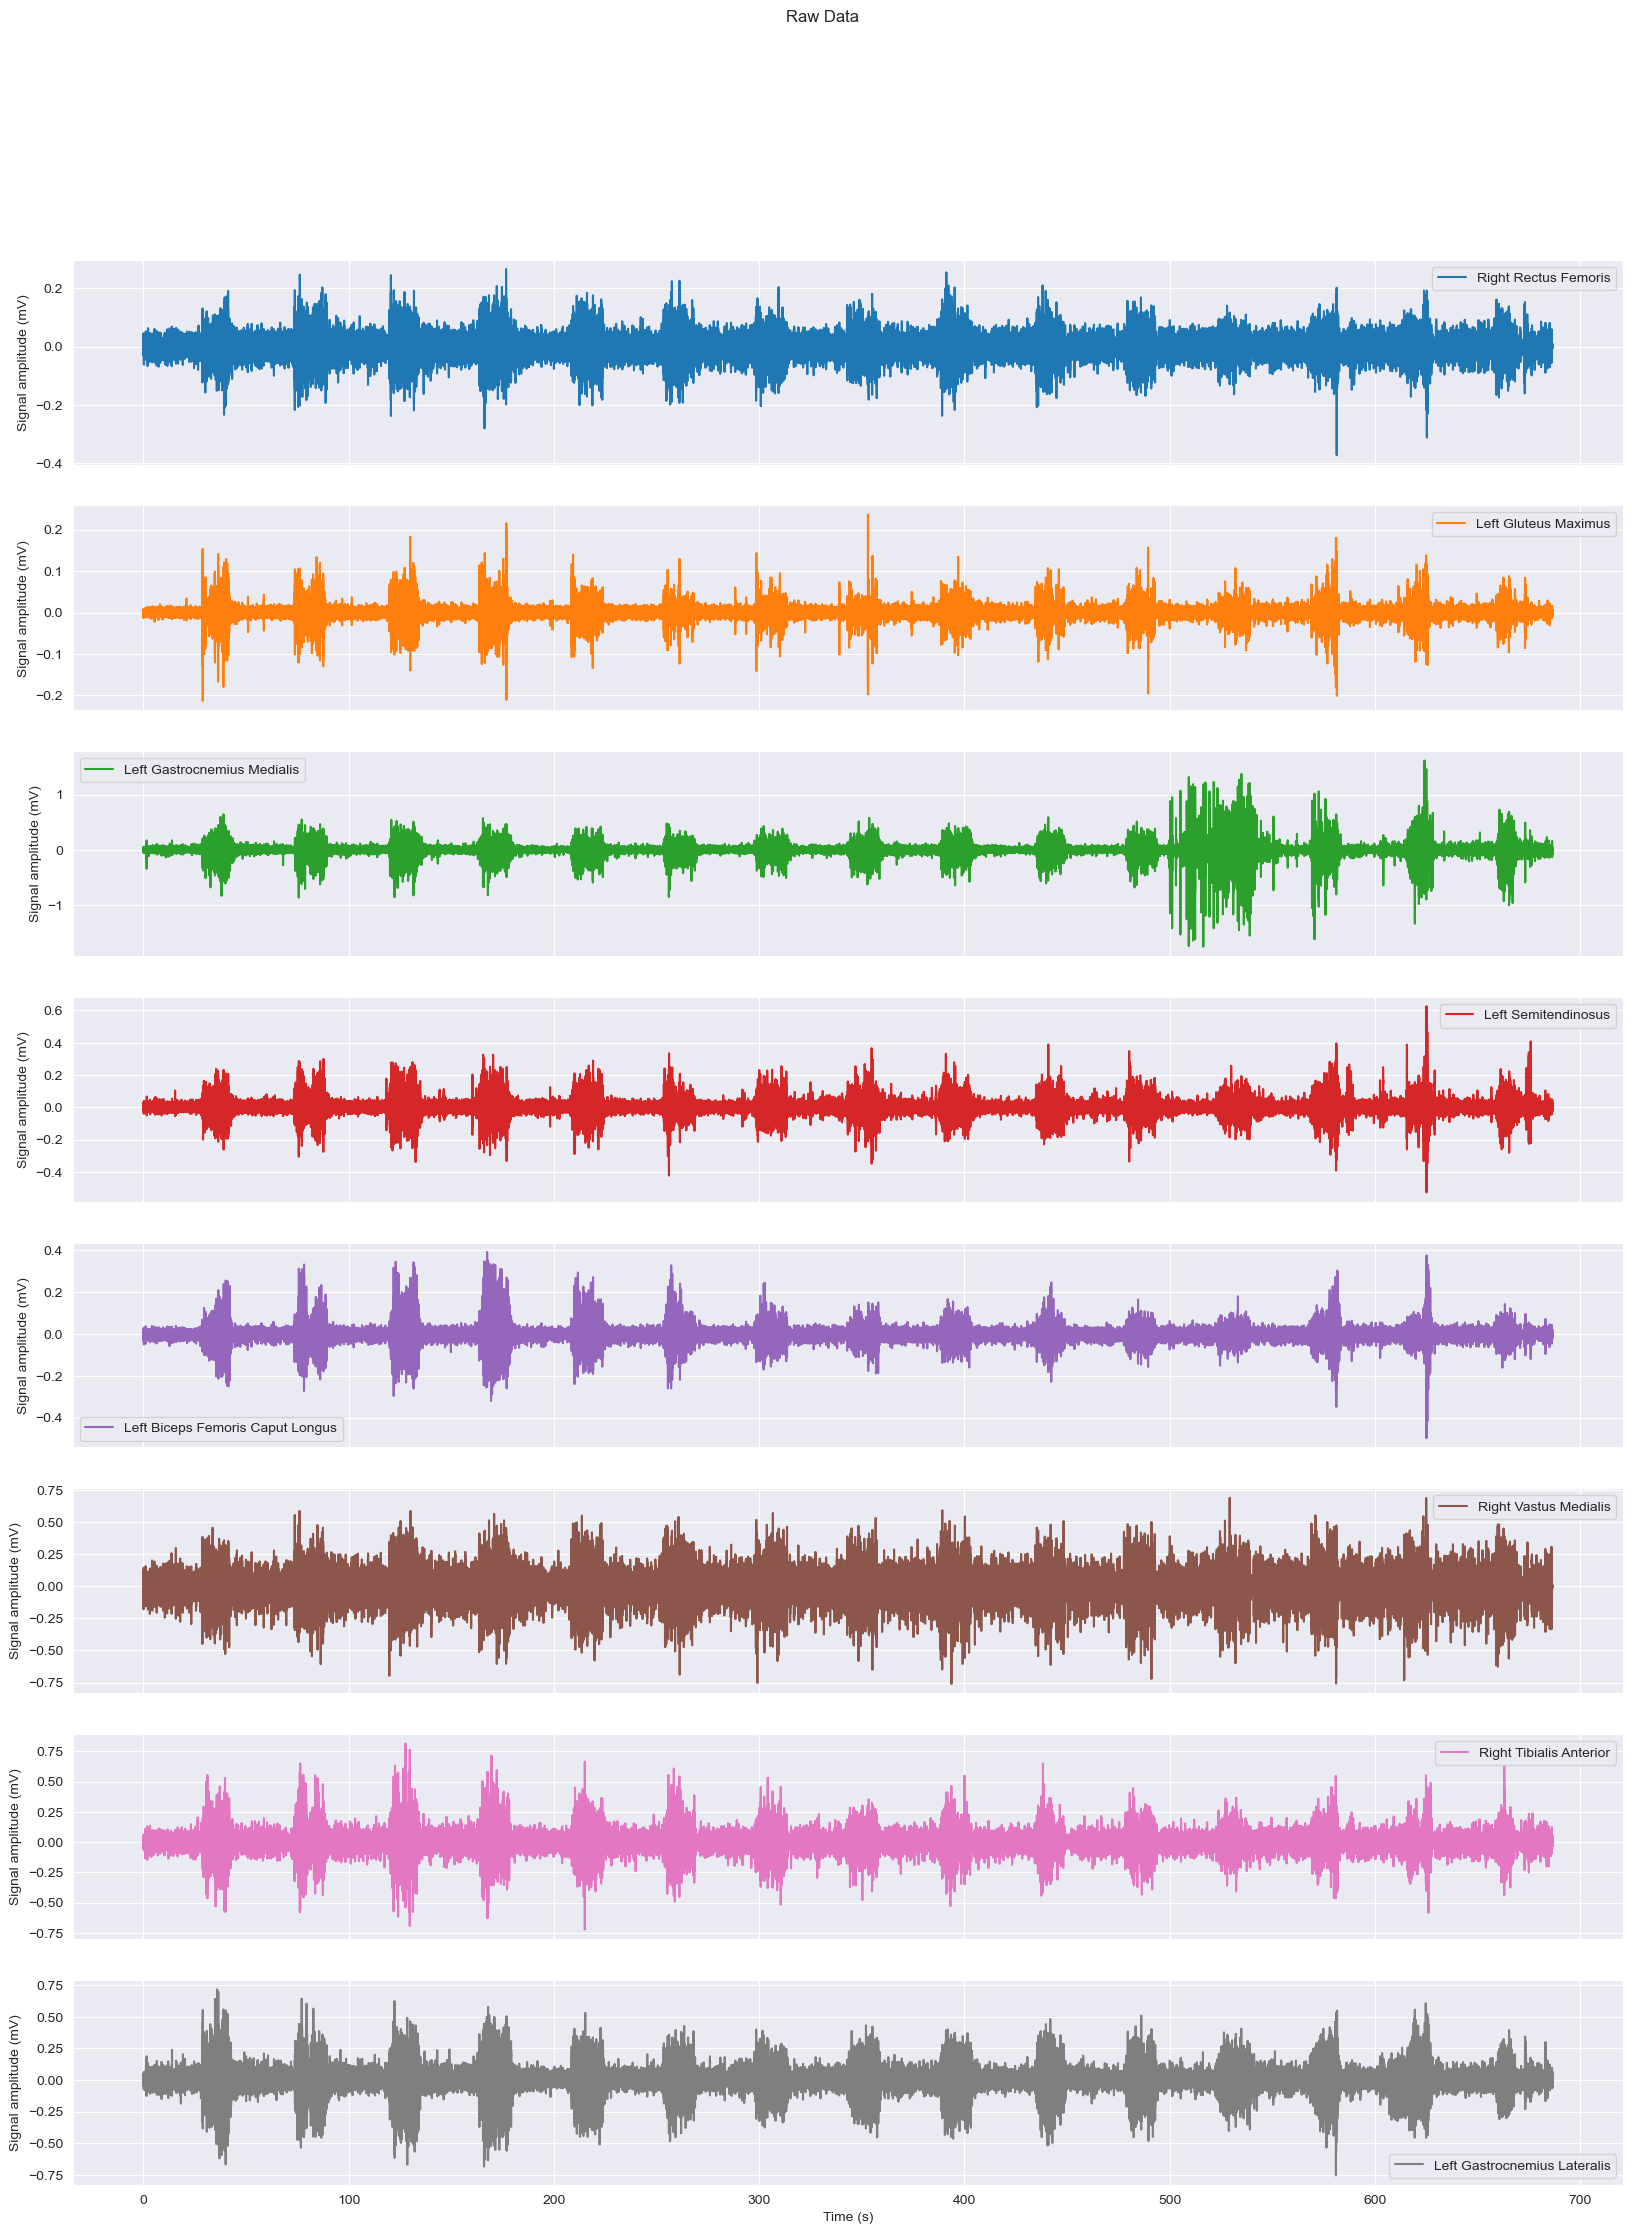

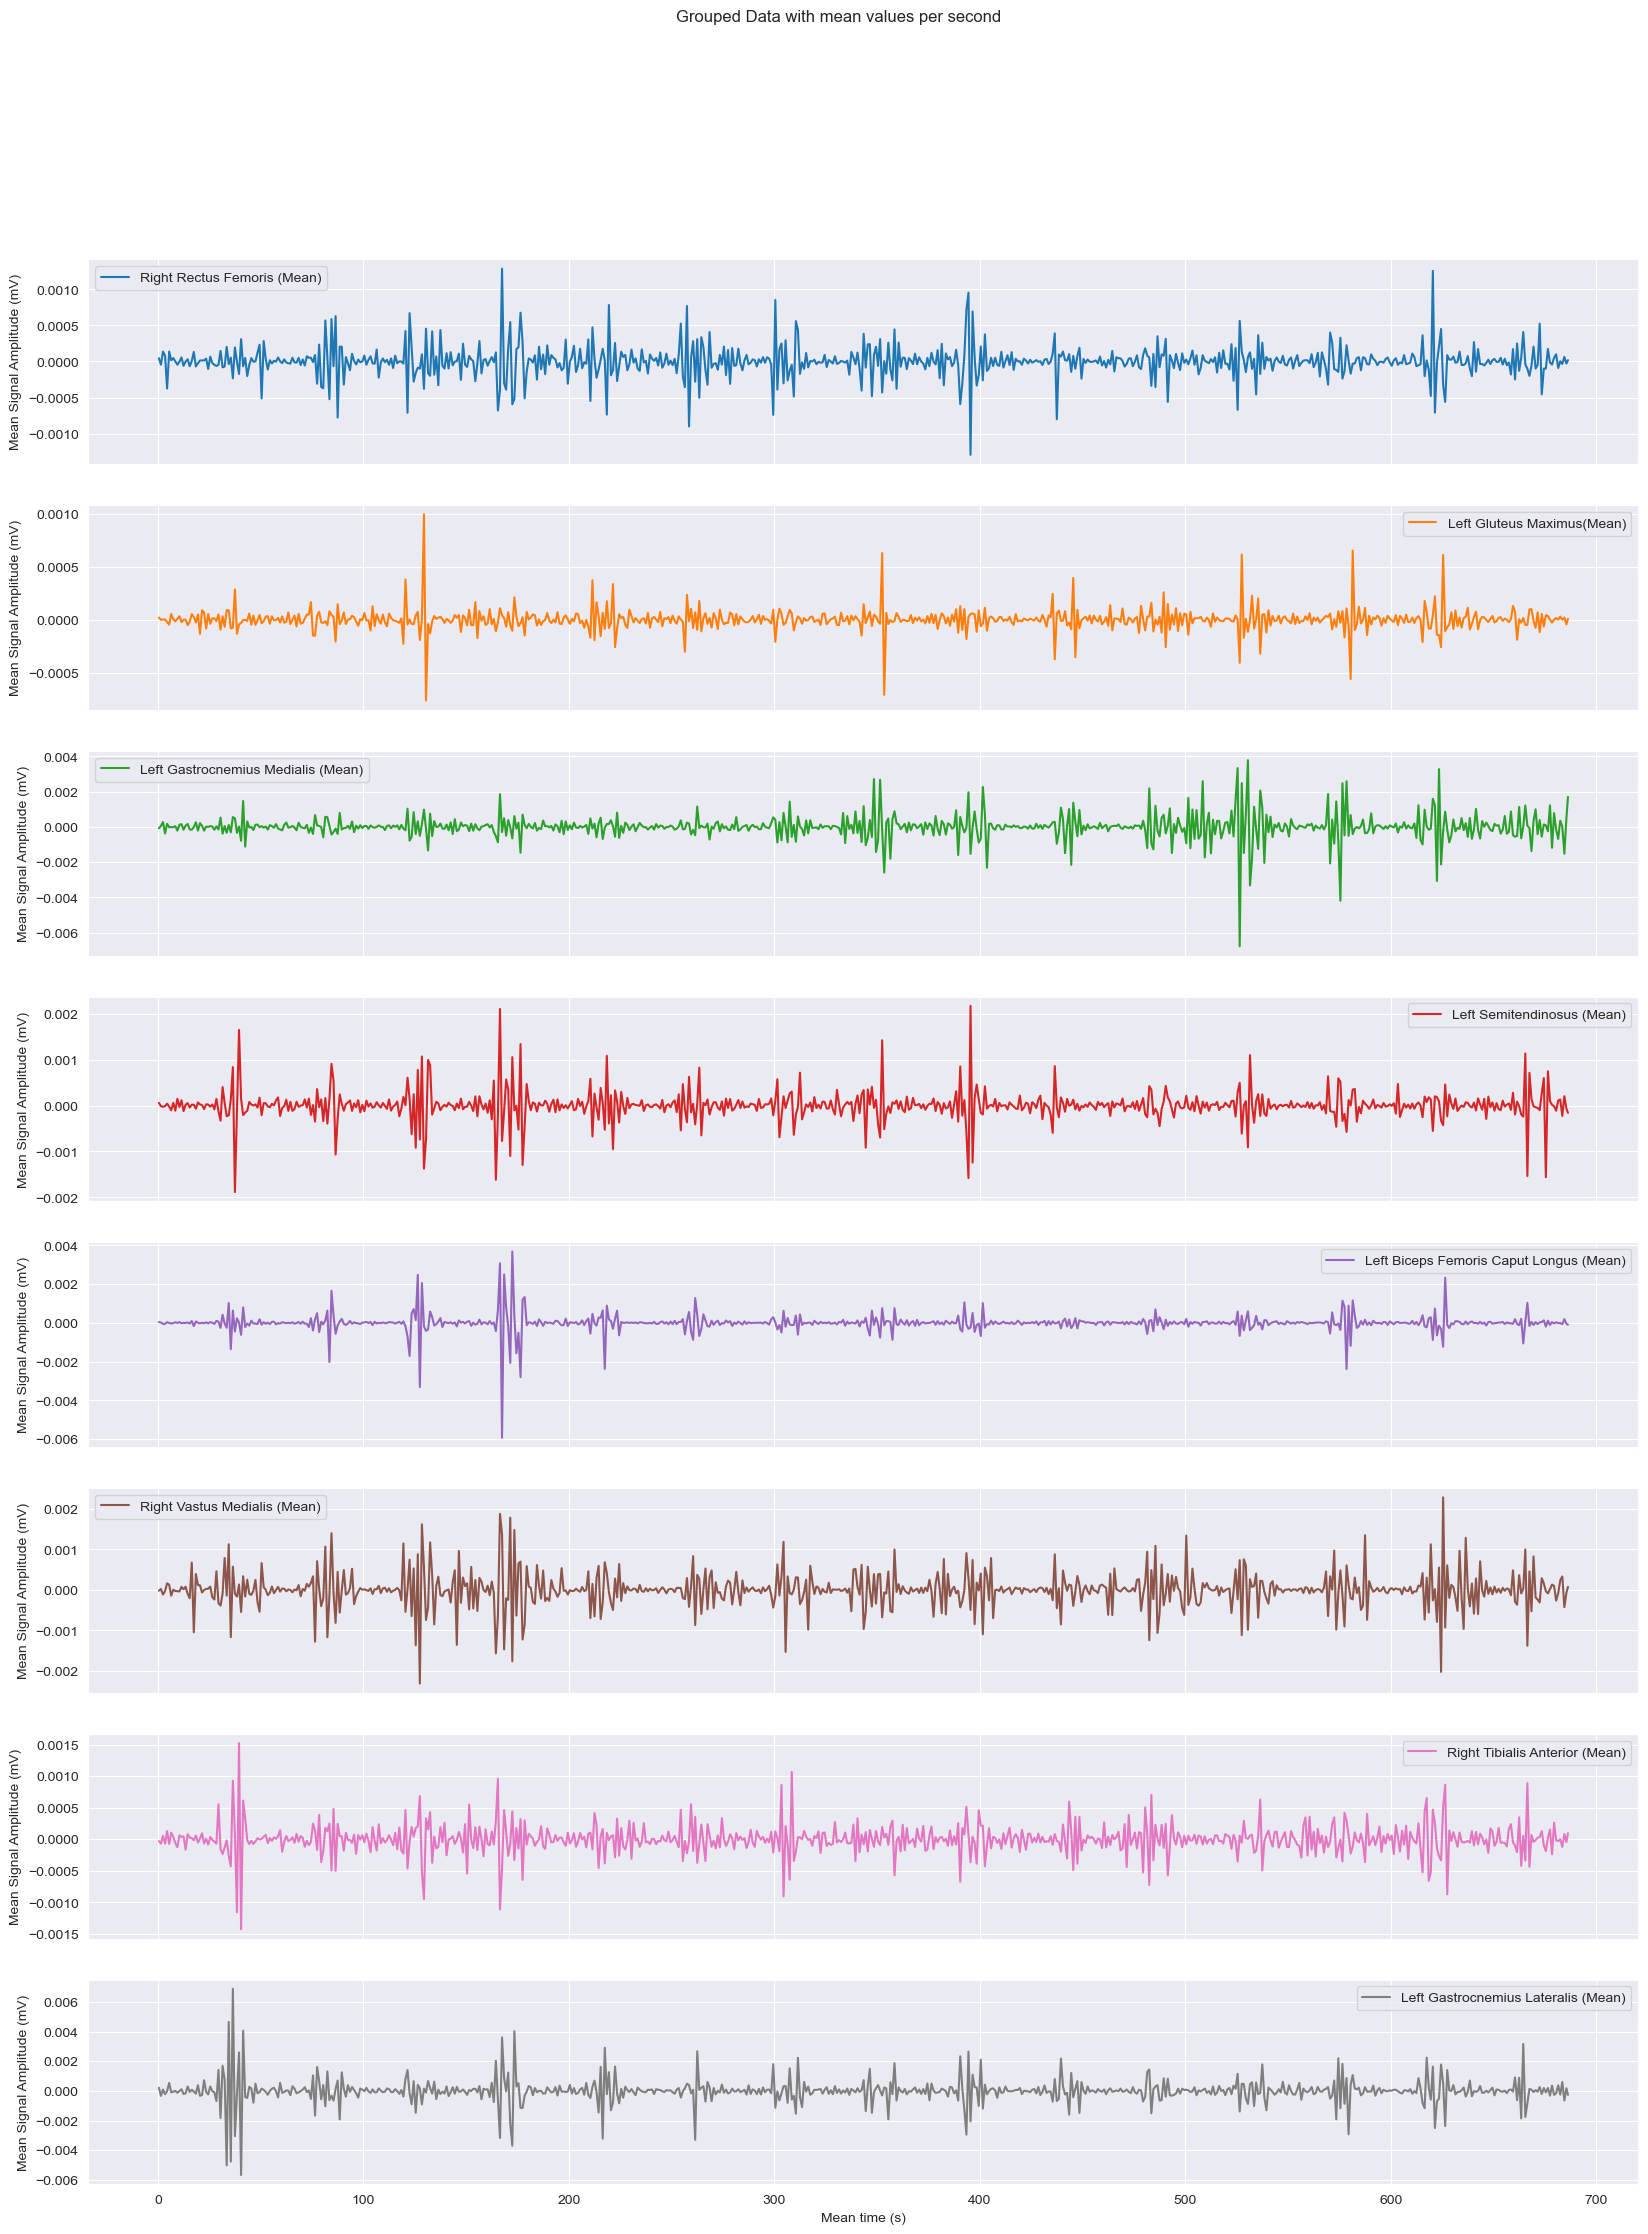

In [60]:
data_df.plot(x='Time', y=['Right Rectus Femoris', 'Left Gluteus Maximus', 'Left Gastrocnemius Medialis', 'Left Semitendinosus', 'Left Biceps Femoris Caput Longus', 'Right Vastus Medialis', 'Right Tibialis Anterior', 'Left Gastrocnemius Lateralis'], kind = 'line', figsize = (20, 25), subplots=True, layout=(8,1), xlabel = 'Time (s)',ylabel='Signal amplitude (mV)', title = 'Raw Data')

#plt.show()

df_mean.plot(x = 'Time (mean)', y = ['Right Rectus Femoris (Mean)', 'Left Gluteus Maximus(Mean)' , 'Left Gastrocnemius Medialis (Mean)', 'Left Semitendinosus (Mean)', 'Left Biceps Femoris Caput Longus (Mean)', 'Right Vastus Medialis (Mean)', 'Right Tibialis Anterior (Mean)', 'Left Gastrocnemius Lateralis (Mean)'], kind = 'line', figsize = (20, 25), subplots=True, layout=(8,1), xlabel = 'Mean time (s)', ylabel='Mean Signal Amplitude (mV)', title='Grouped Data with mean values per second')
plt.show()

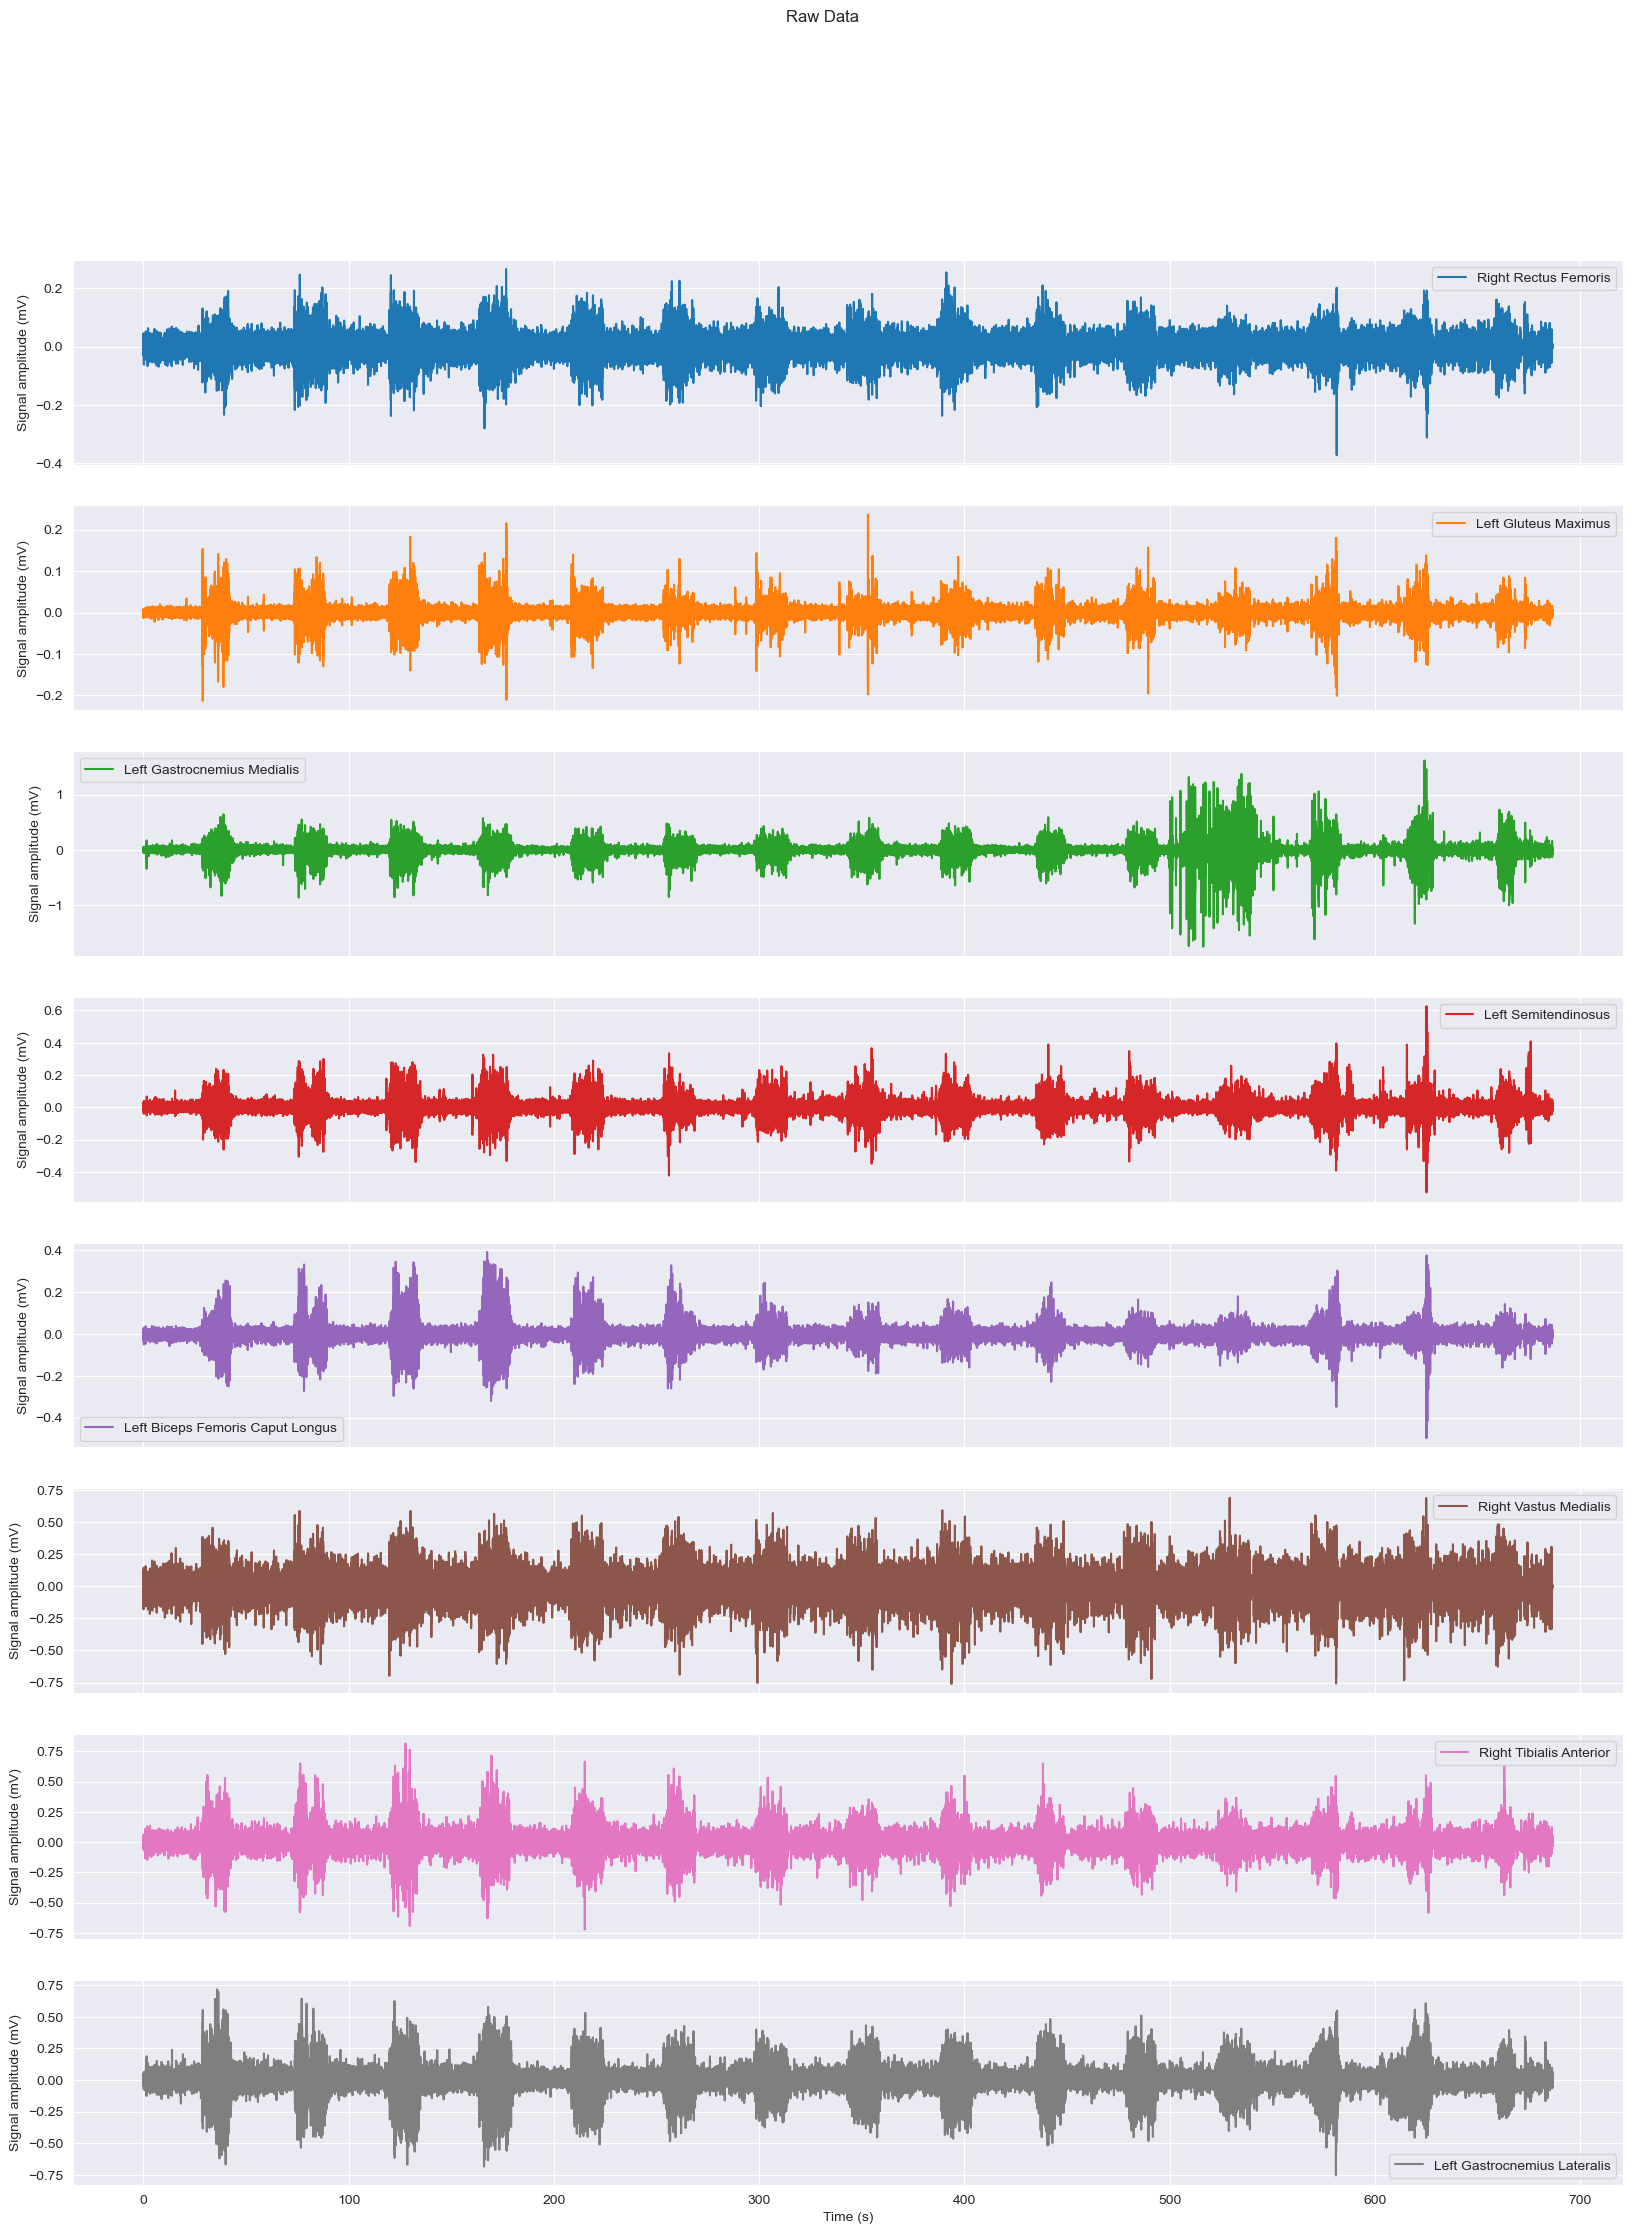

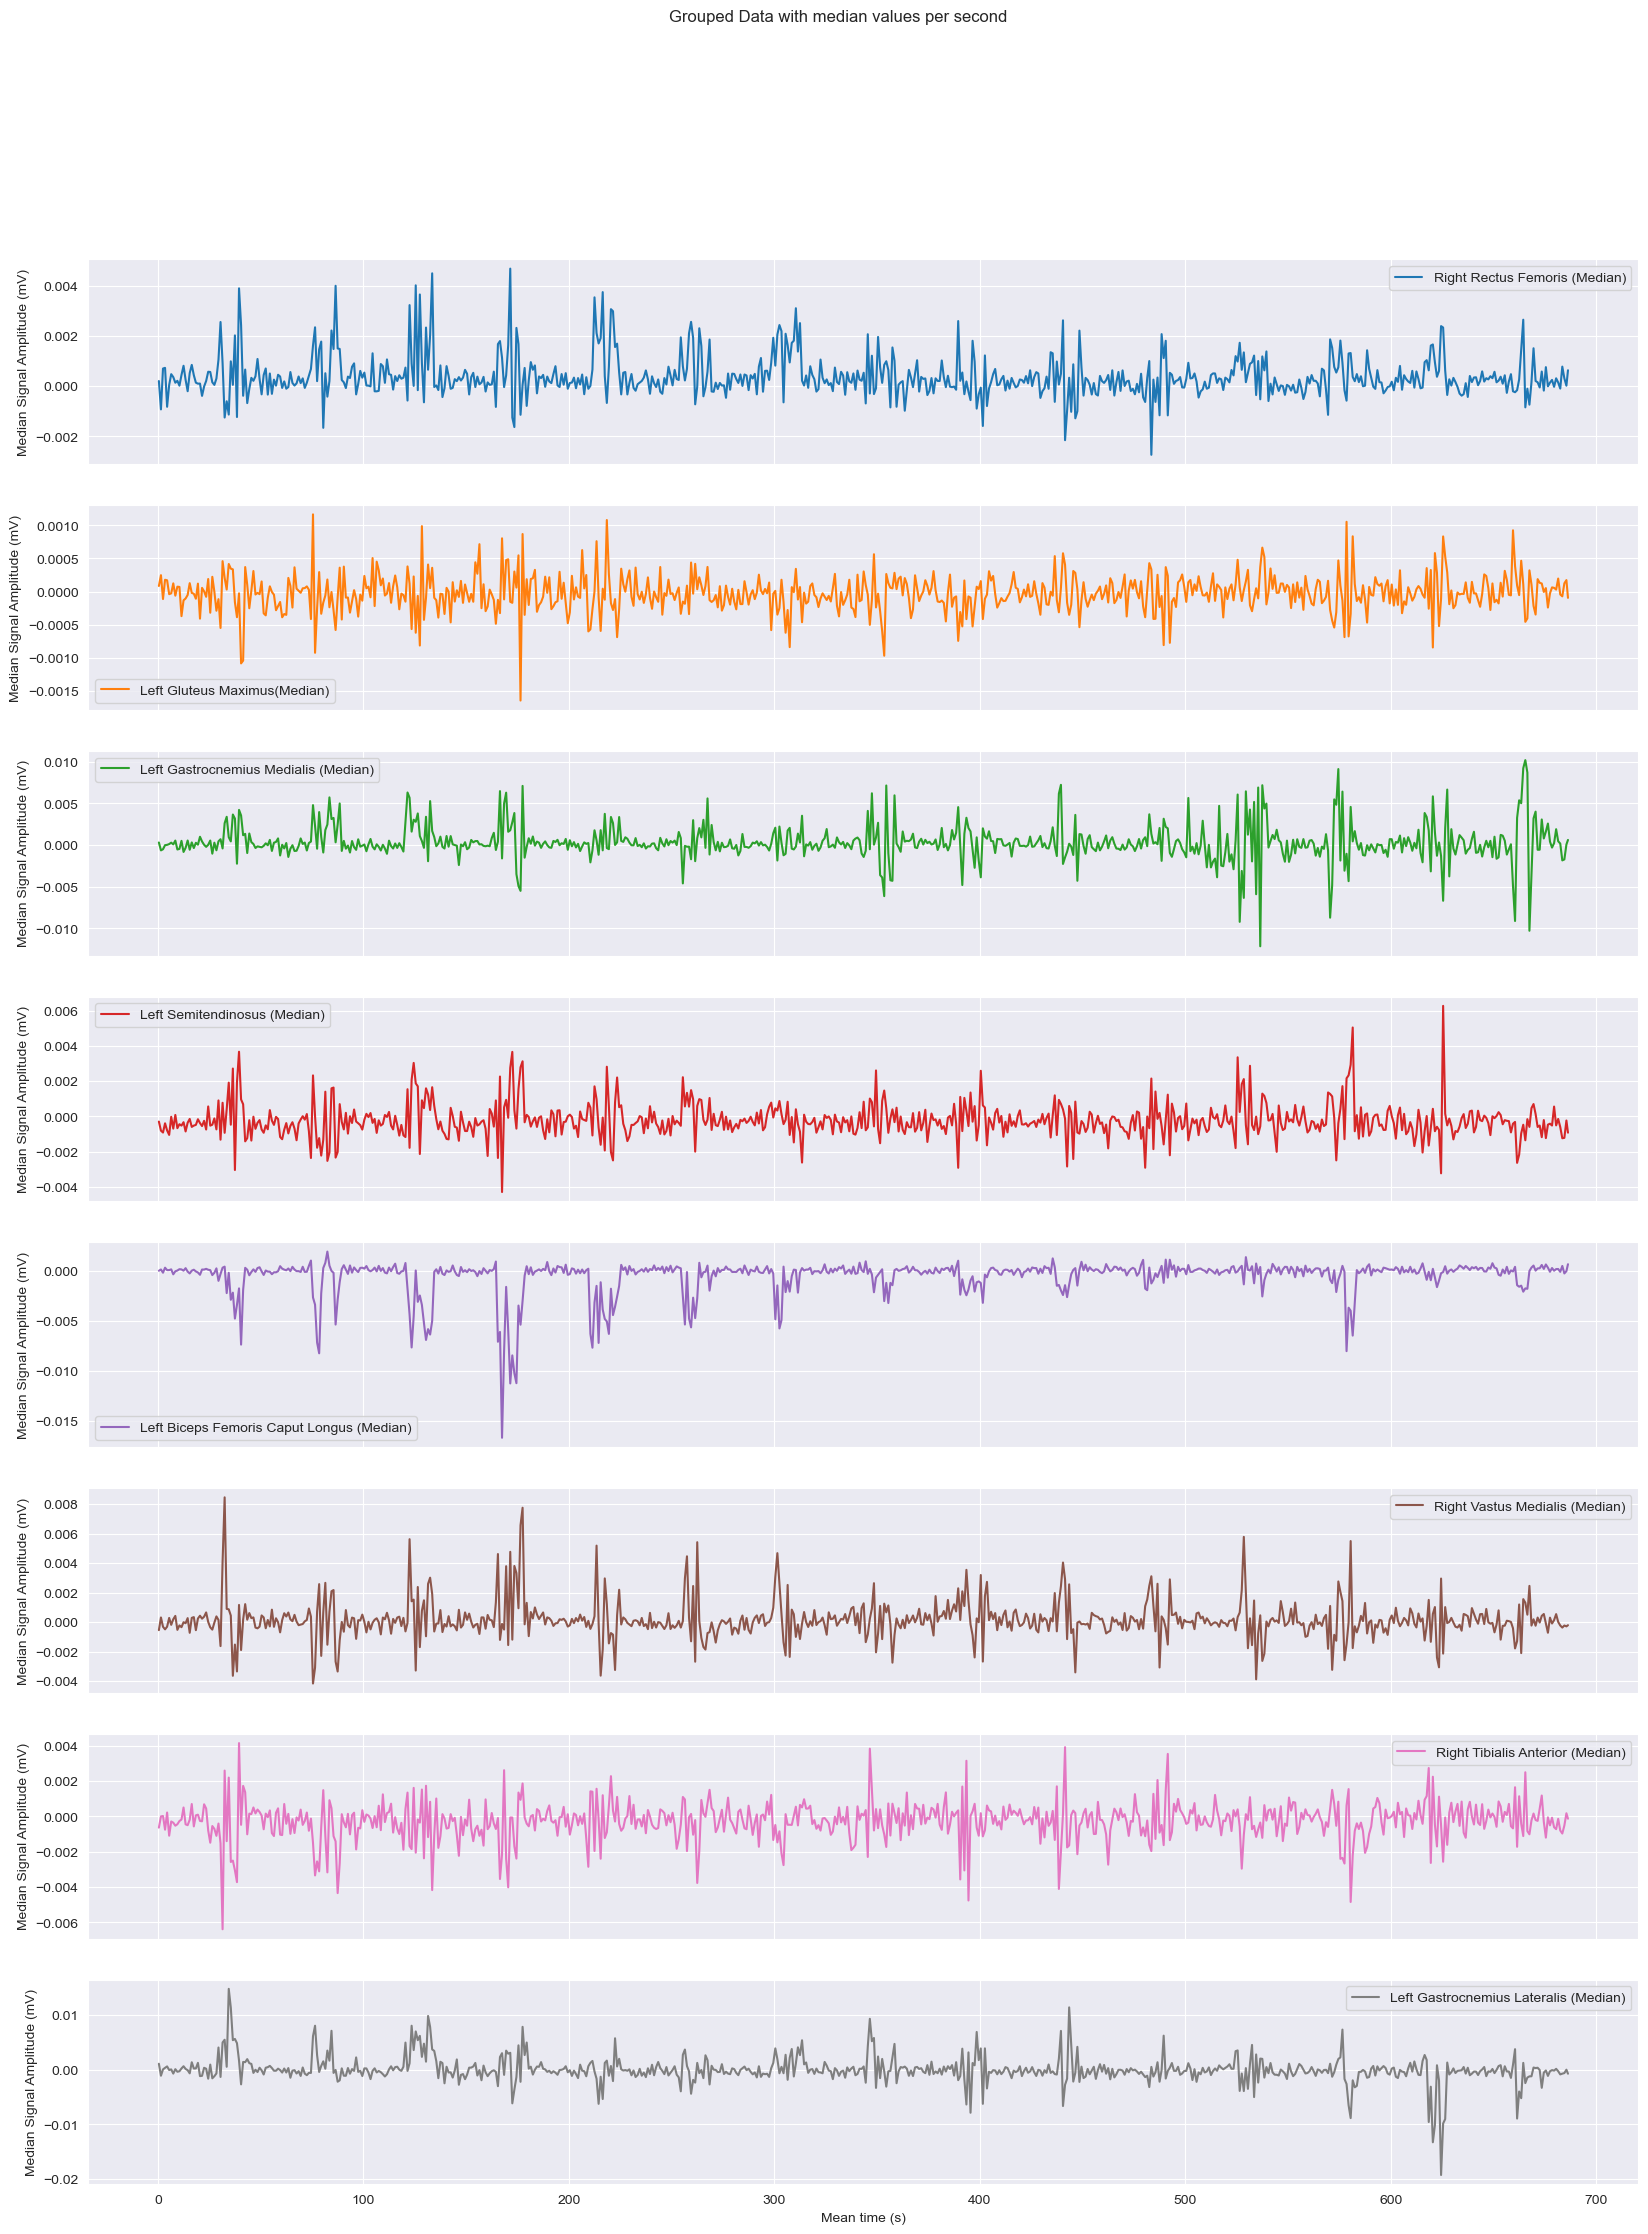

In [61]:
data_df.plot(x='Time', y=['Right Rectus Femoris', 'Left Gluteus Maximus', 'Left Gastrocnemius Medialis', 'Left Semitendinosus', 'Left Biceps Femoris Caput Longus', 'Right Vastus Medialis', 'Right Tibialis Anterior', 'Left Gastrocnemius Lateralis'], kind = 'line', figsize = (20, 25), subplots=True, layout=(8,1), xlabel = 'Time (s)',ylabel='Signal amplitude (mV)', title = 'Raw Data')

#plt.show()

df_median.plot(x = 'Time (Median)', y = ['Right Rectus Femoris (Median)', 'Left Gluteus Maximus(Median)' , 'Left Gastrocnemius Medialis (Median)', 'Left Semitendinosus (Median)', 'Left Biceps Femoris Caput Longus (Median)', 'Right Vastus Medialis (Median)', 'Right Tibialis Anterior (Median)', 'Left Gastrocnemius Lateralis (Median)'], kind = 'line', figsize = (20, 25), subplots=True, layout=(8,1), xlabel = 'Mean time (s)', ylabel='Median Signal Amplitude (mV)', title='Grouped Data with median values per second')
plt.show()

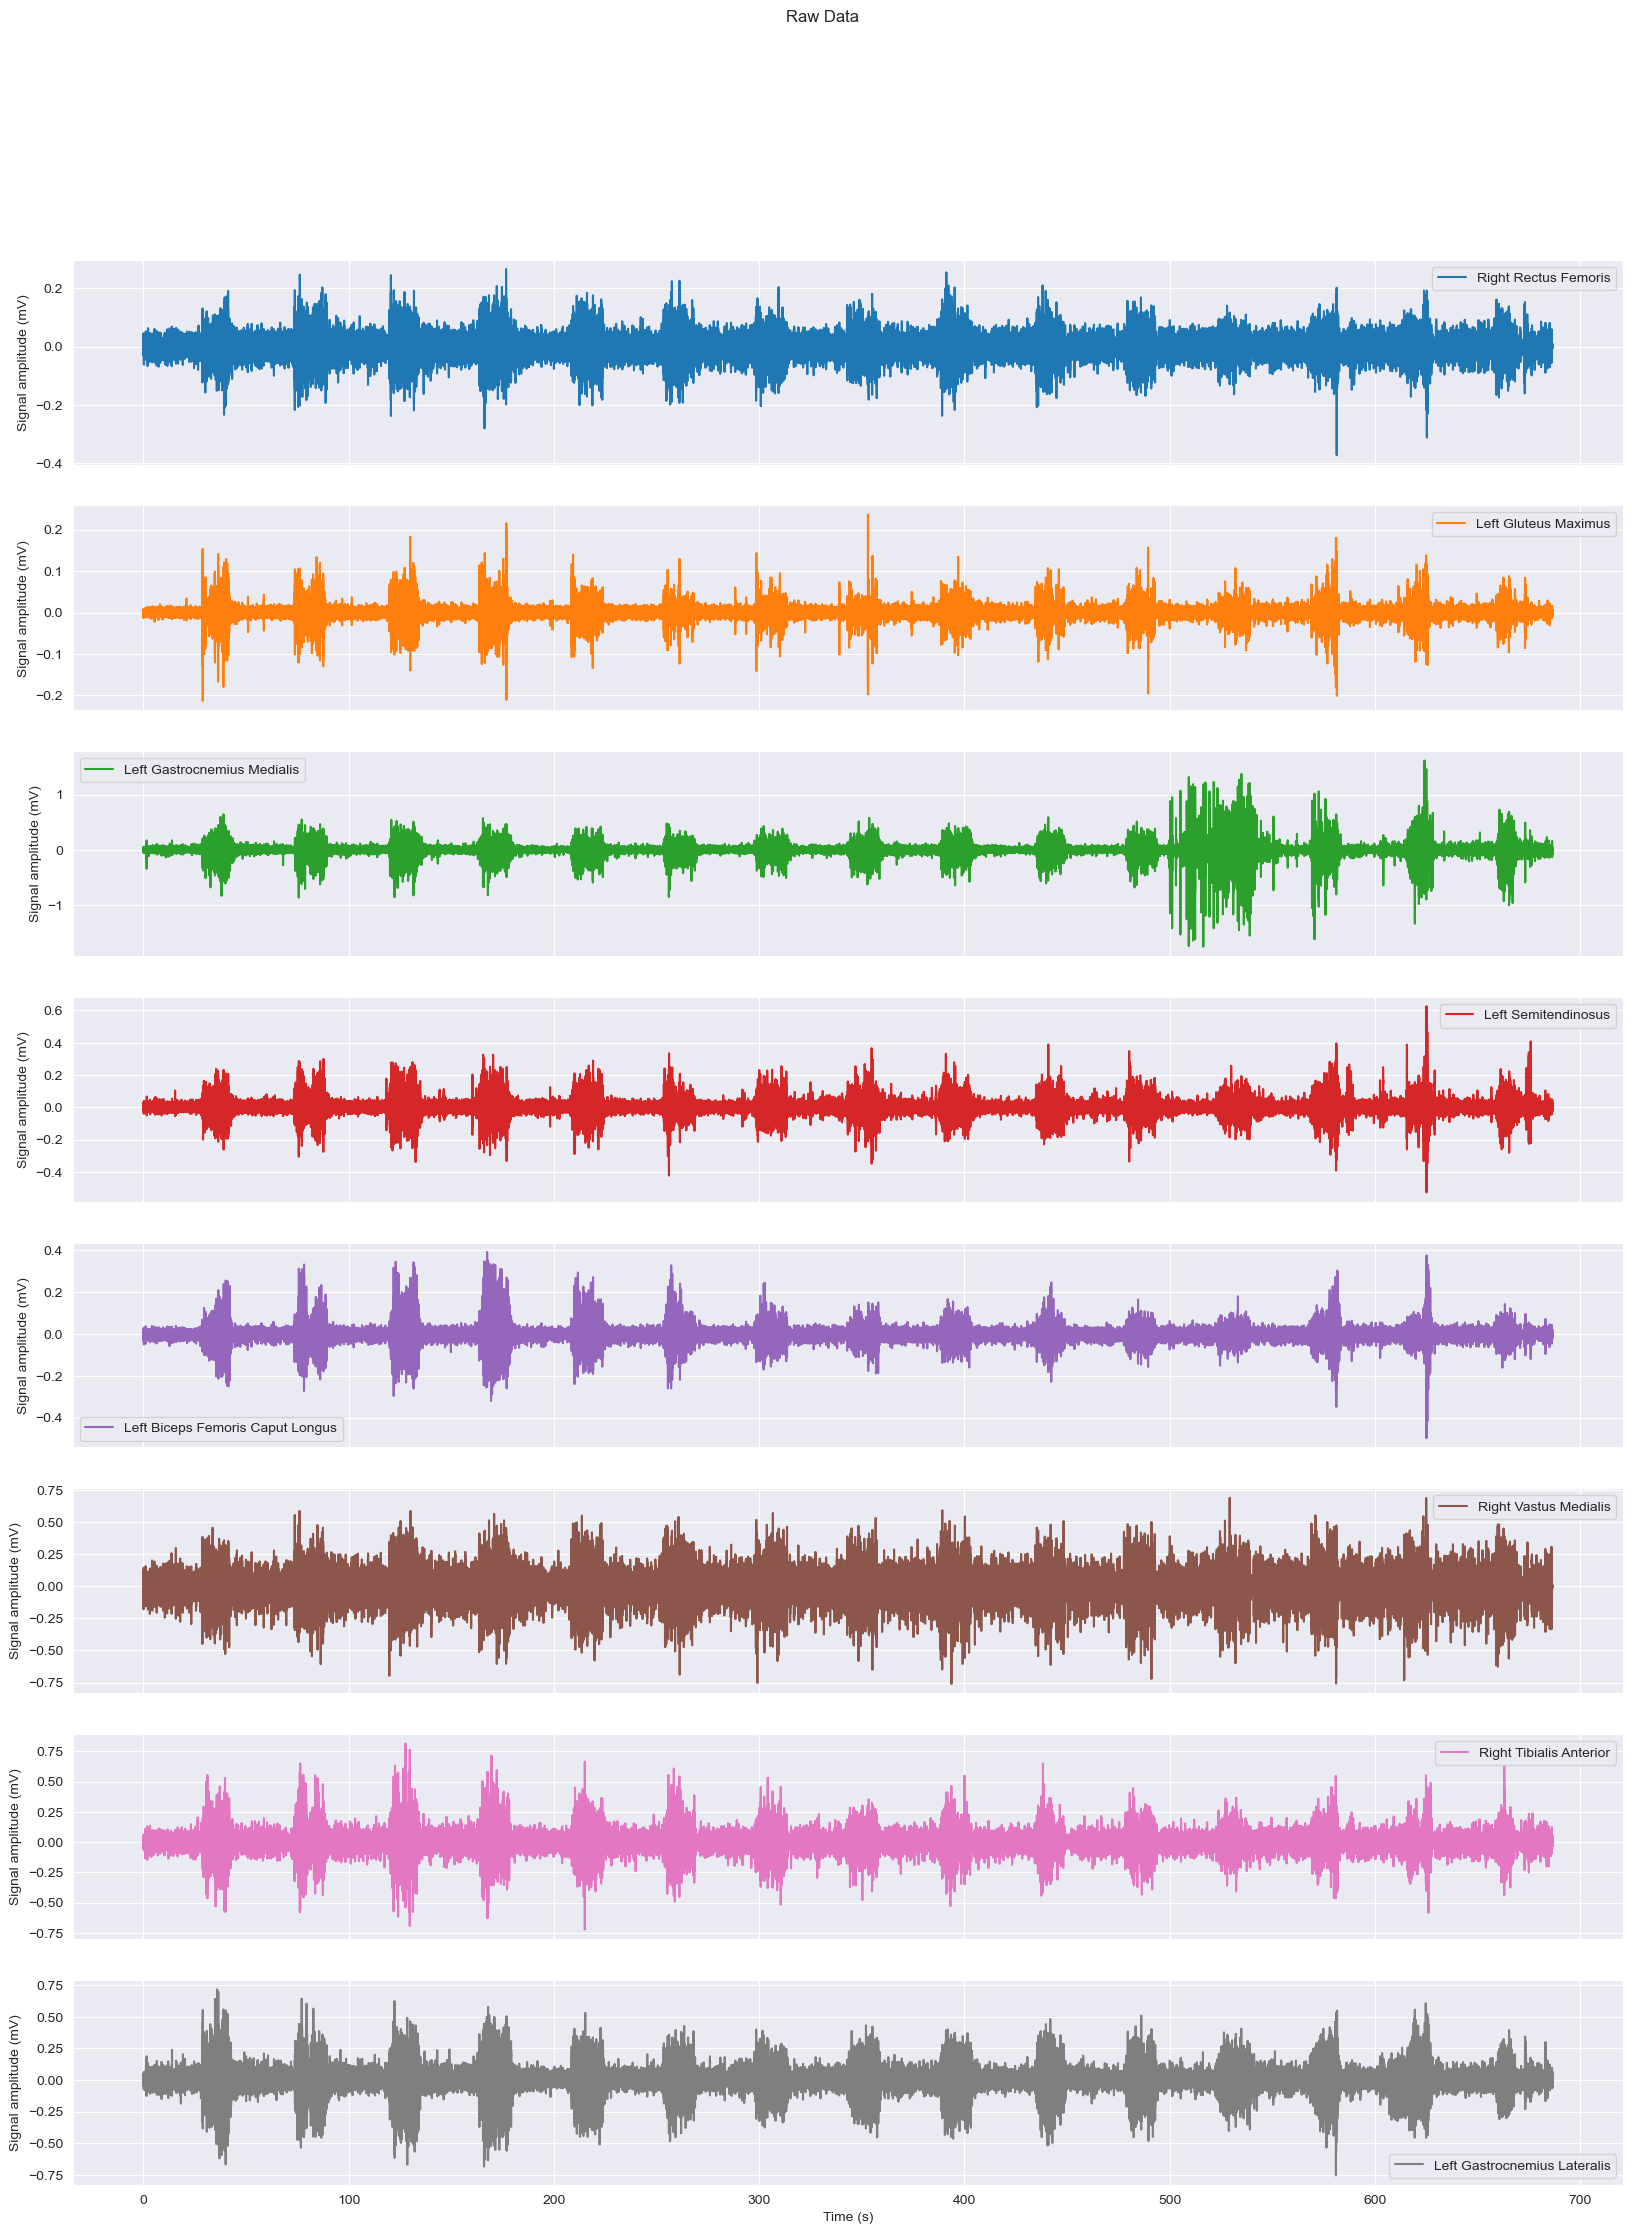

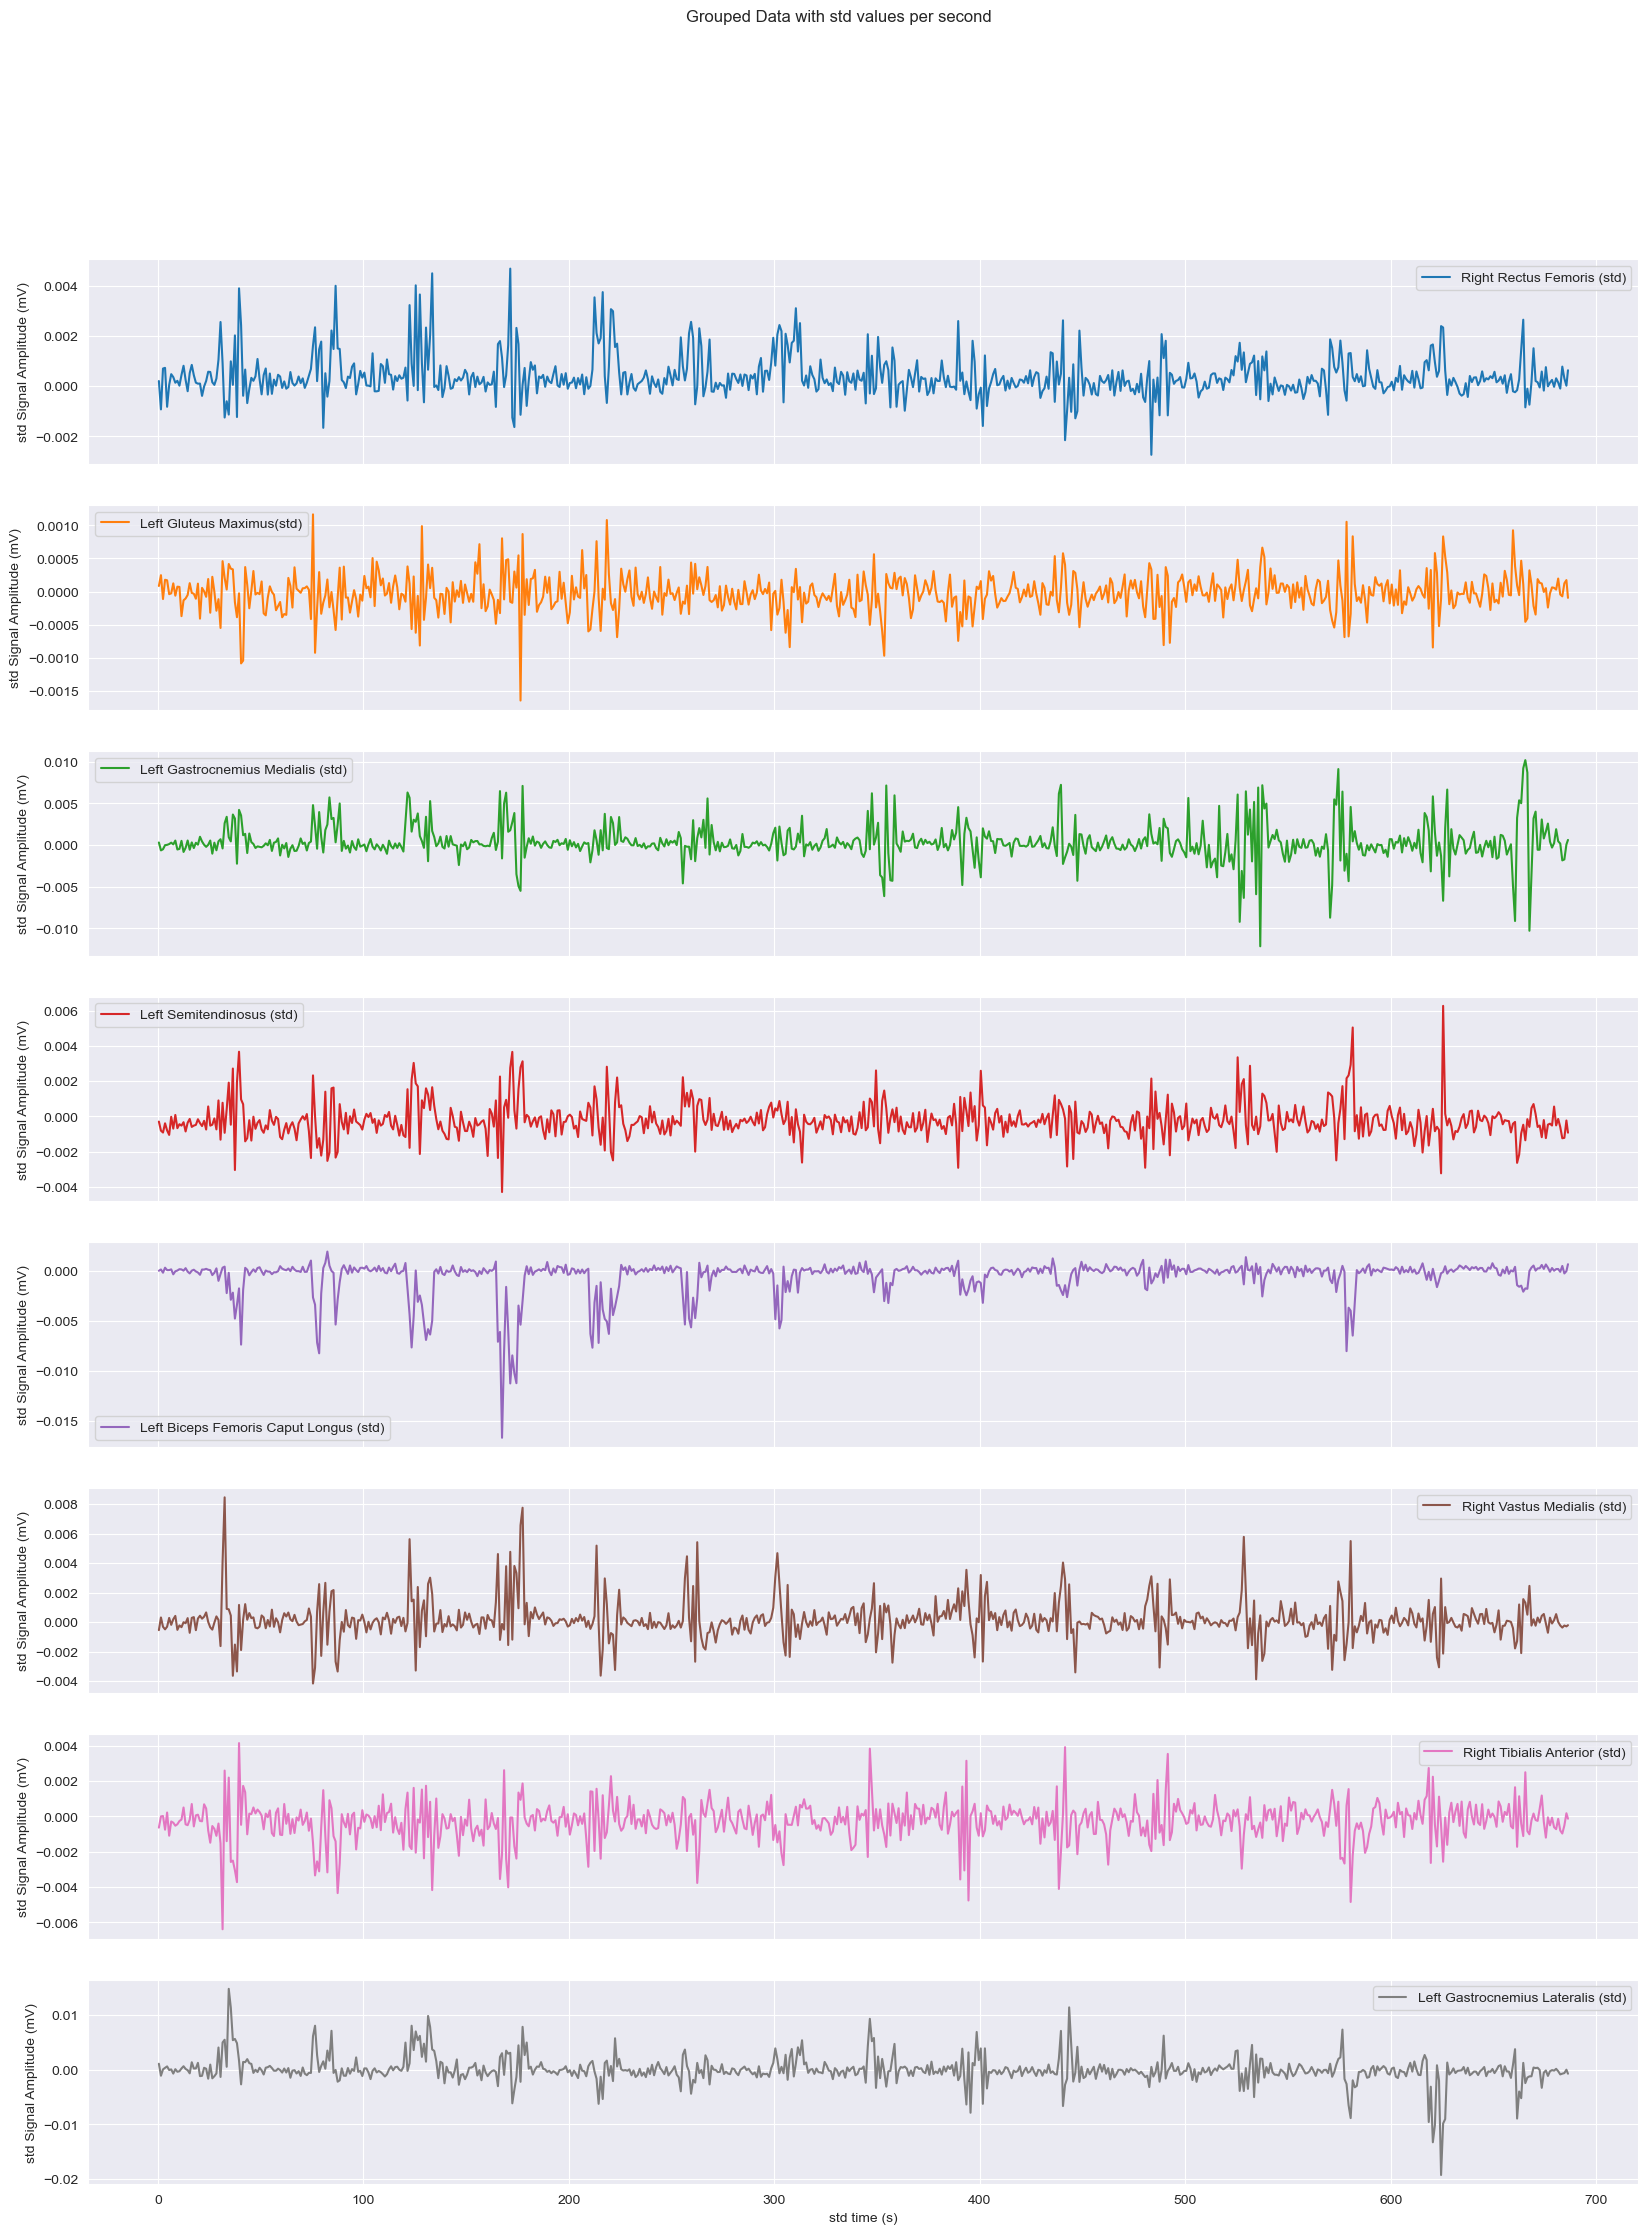

In [62]:
data_df.plot(x='Time', y=['Right Rectus Femoris', 'Left Gluteus Maximus', 'Left Gastrocnemius Medialis', 'Left Semitendinosus', 'Left Biceps Femoris Caput Longus', 'Right Vastus Medialis', 'Right Tibialis Anterior', 'Left Gastrocnemius Lateralis'], kind = 'line', figsize = (20, 25), subplots=True, layout=(8,1), xlabel = 'Time (s)',ylabel='Signal amplitude (mV)', title = 'Raw Data')

#plt.show()

df_std.plot(x = 'Time (std)', y = ['Right Rectus Femoris (std)', 'Left Gluteus Maximus(std)' , 'Left Gastrocnemius Medialis (std)', 'Left Semitendinosus (std)', 'Left Biceps Femoris Caput Longus (std)', 'Right Vastus Medialis (std)', 'Right Tibialis Anterior (std)', 'Left Gastrocnemius Lateralis (std)'], kind = 'line', figsize = (20, 25), subplots=True, layout=(8,1), xlabel = 'std time (s)', ylabel='std Signal Amplitude (mV)', title='Grouped Data with std values per second')
plt.show()

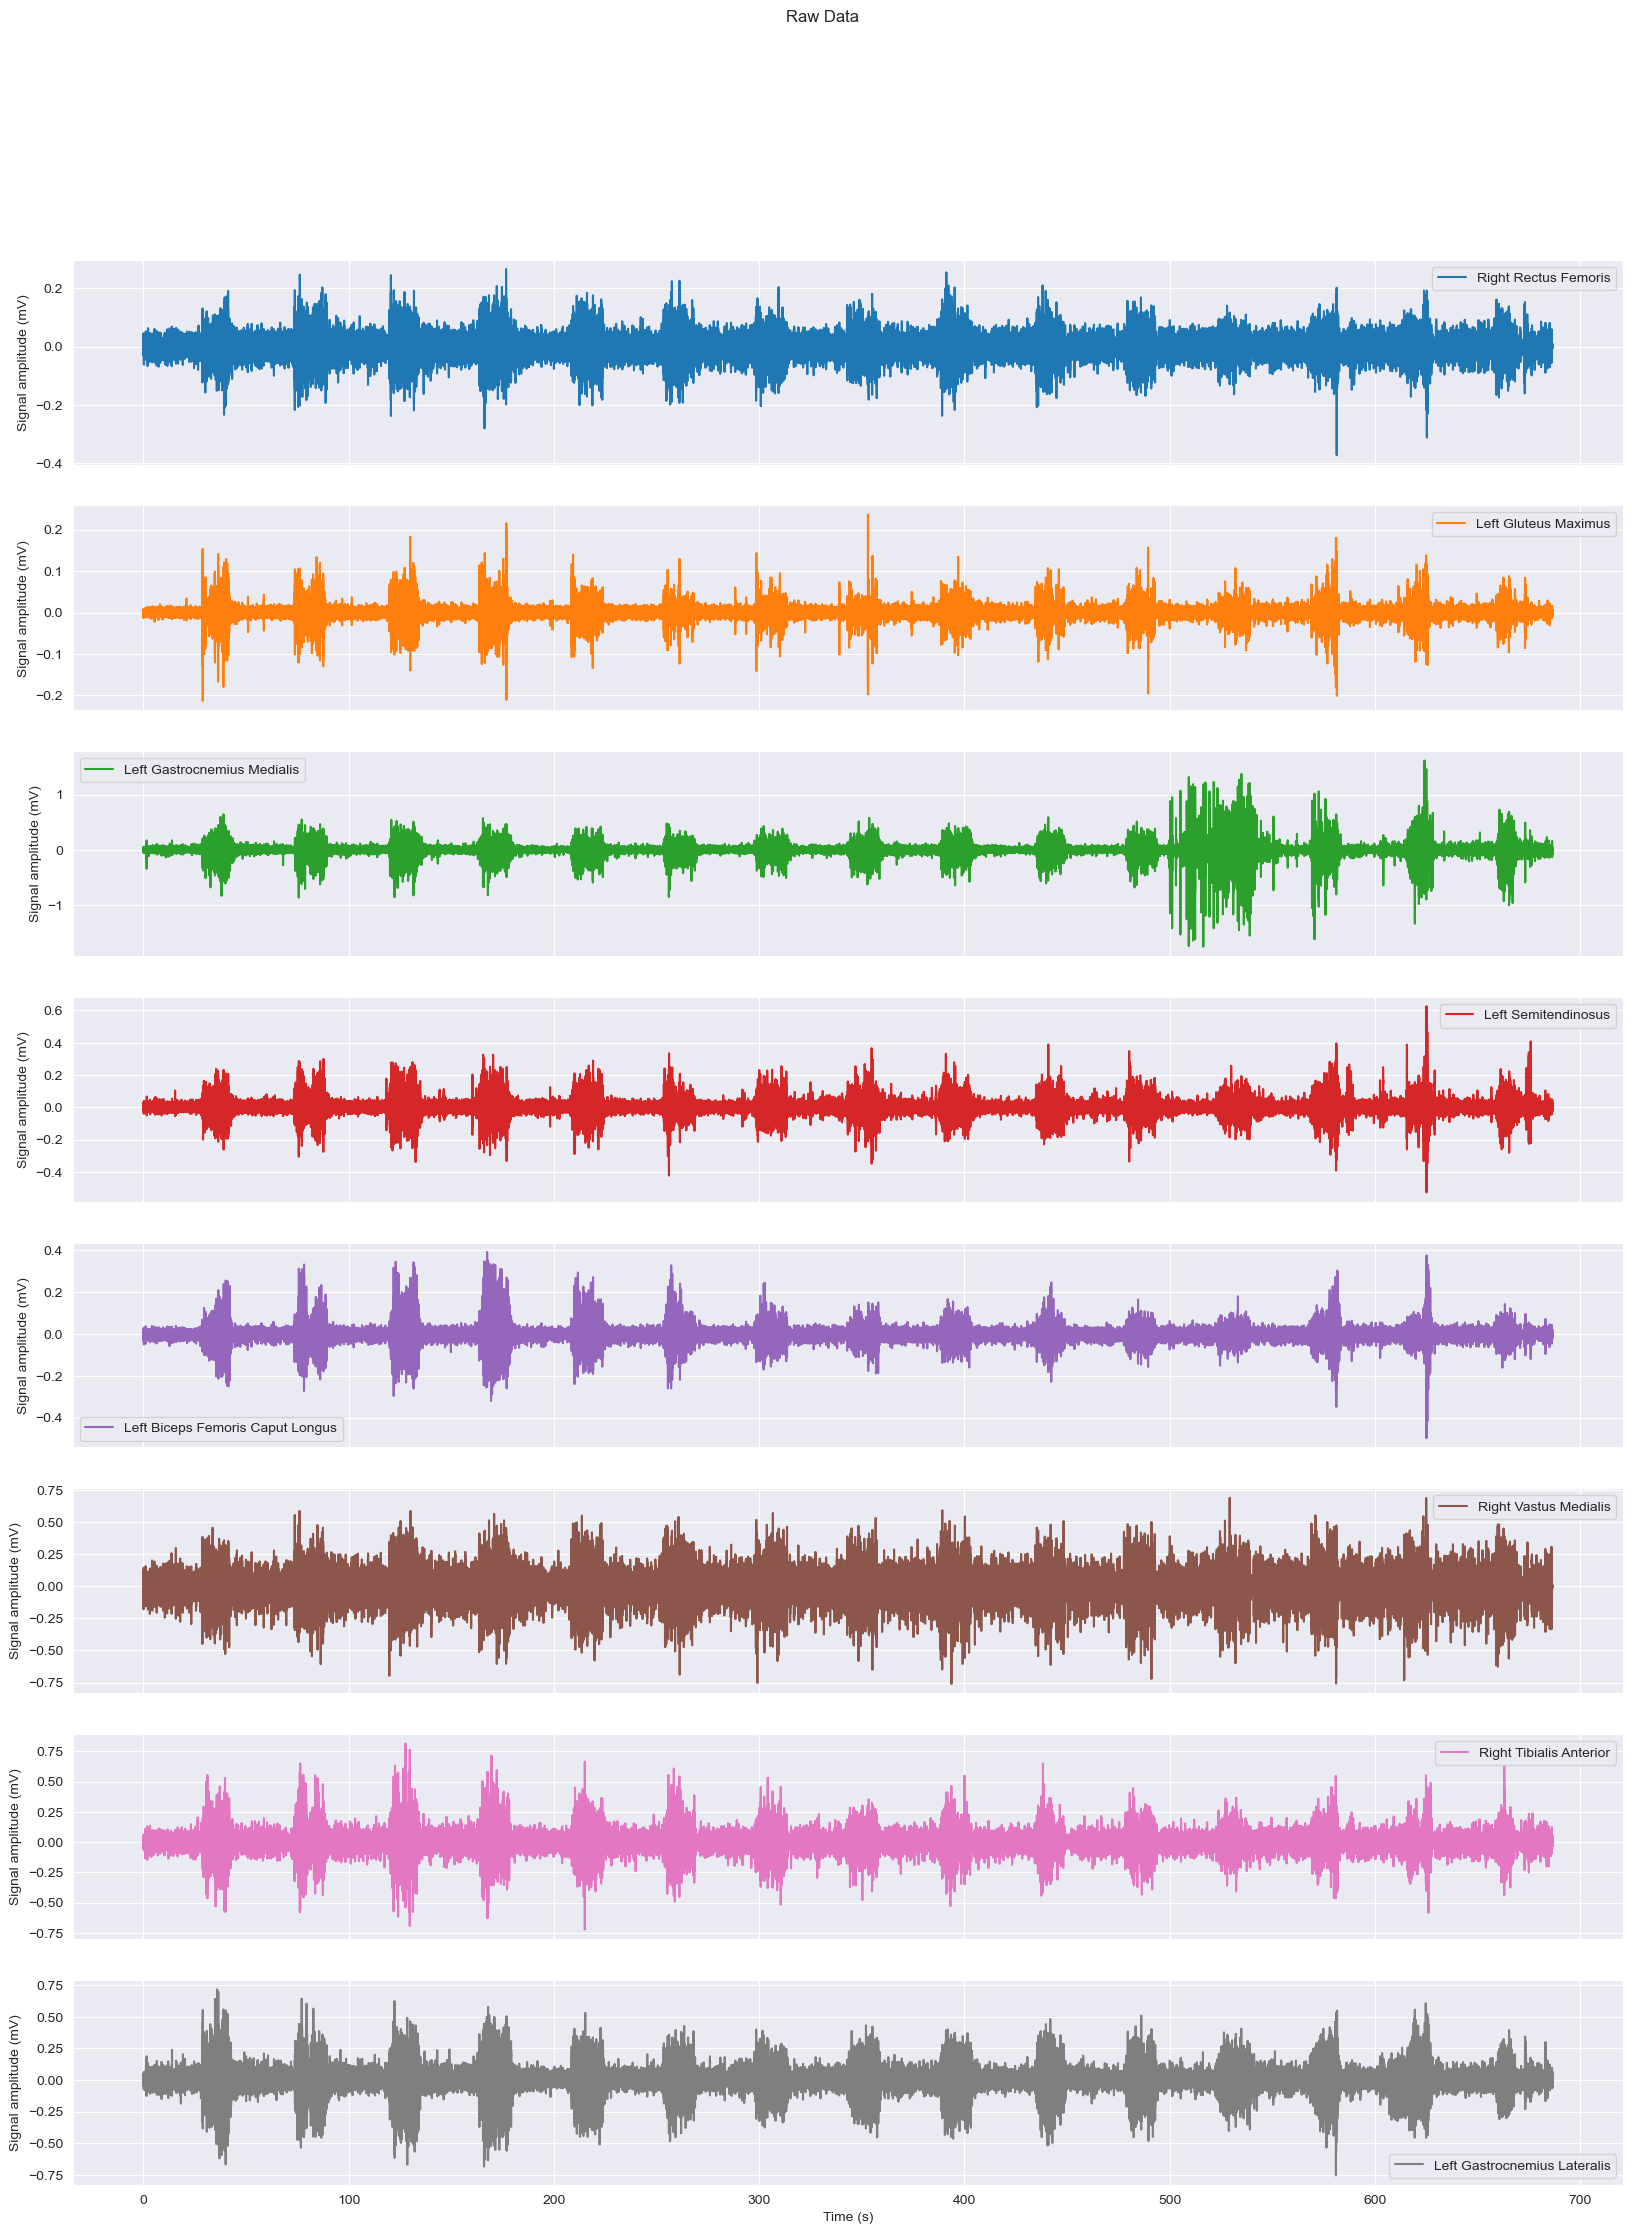

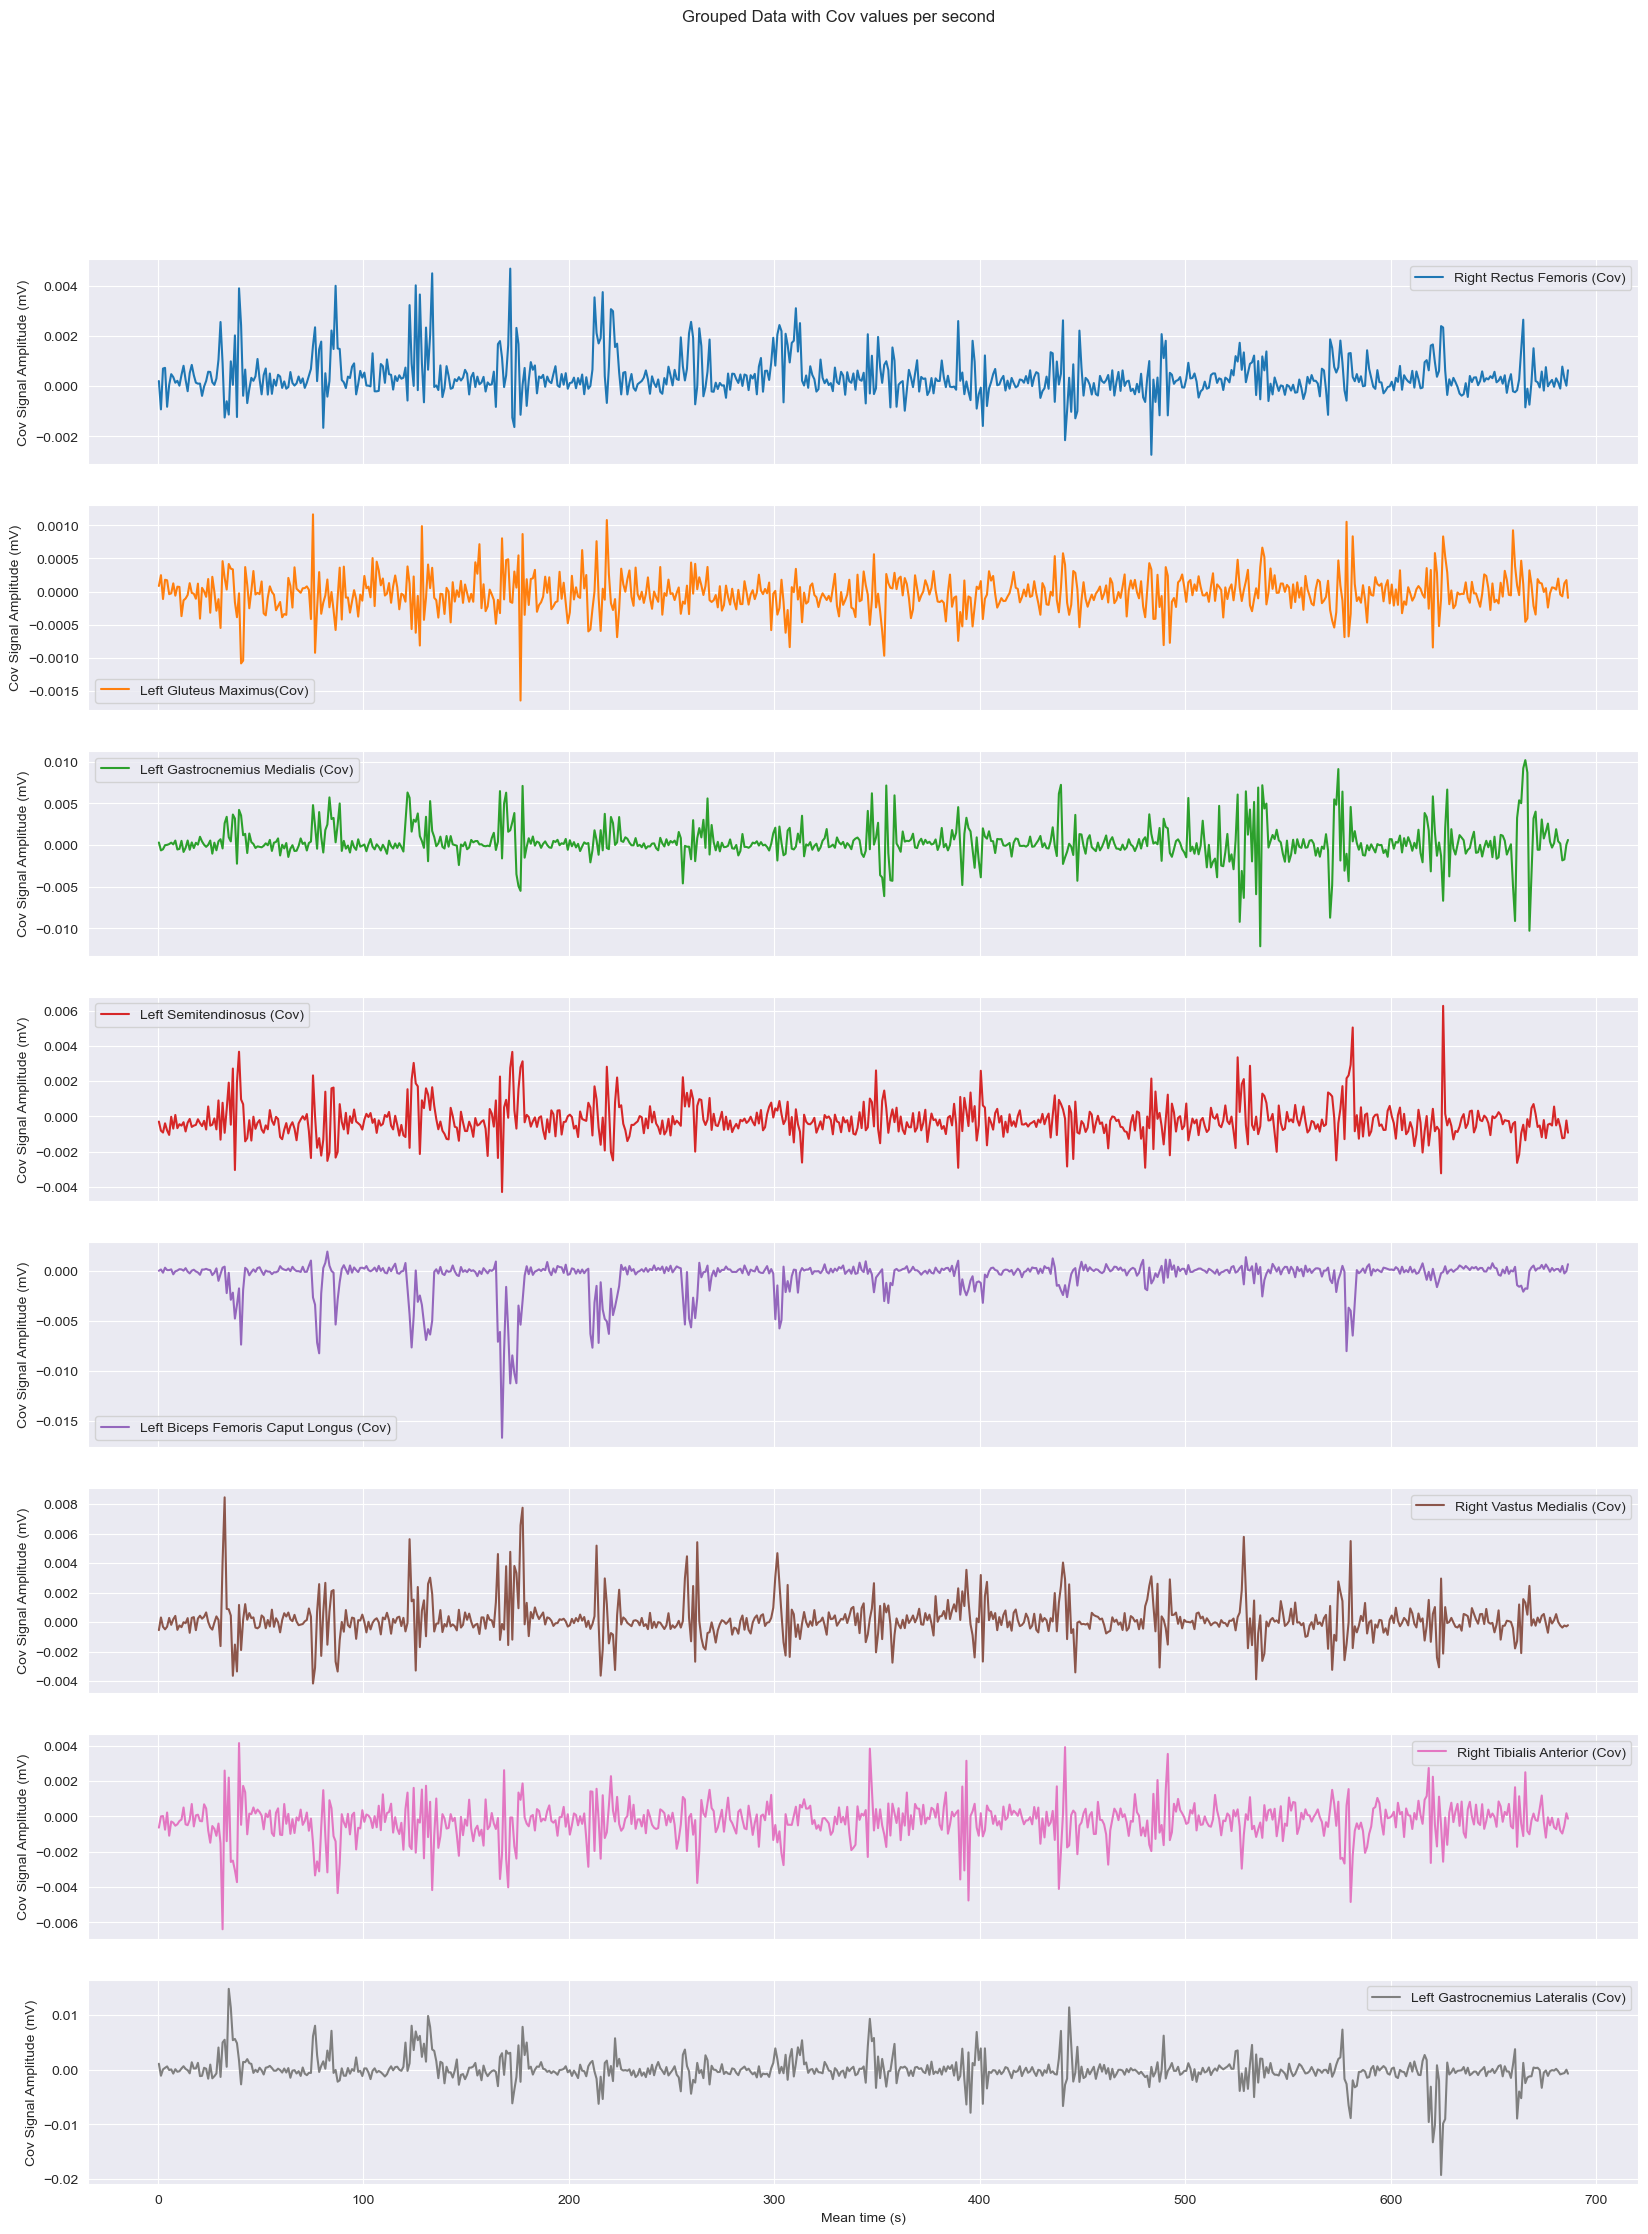

In [66]:
data_df.plot(x='Time', y=['Right Rectus Femoris', 'Left Gluteus Maximus', 'Left Gastrocnemius Medialis', 'Left Semitendinosus', 'Left Biceps Femoris Caput Longus', 'Right Vastus Medialis', 'Right Tibialis Anterior', 'Left Gastrocnemius Lateralis'], kind = 'line', figsize = (20, 25), subplots=True, layout=(8,1), xlabel = 'Time (s)',ylabel='Signal amplitude (mV)', title = 'Raw Data')

#plt.show()

df_cov.plot(x = 'Time (Cov)', y = ['Right Rectus Femoris (Cov)', 'Left Gluteus Maximus(Cov)' , 'Left Gastrocnemius Medialis (Cov)', 'Left Semitendinosus (Cov)', 'Left Biceps Femoris Caput Longus (Cov)', 'Right Vastus Medialis (Cov)', 'Right Tibialis Anterior (Cov)', 'Left Gastrocnemius Lateralis (Cov)'], kind = 'line', figsize = (20, 25), subplots=True, layout=(8,1), xlabel = 'Mean time (s)', ylabel='Cov Signal Amplitude (mV)', title='Grouped Data with Cov values per second')
plt.show()

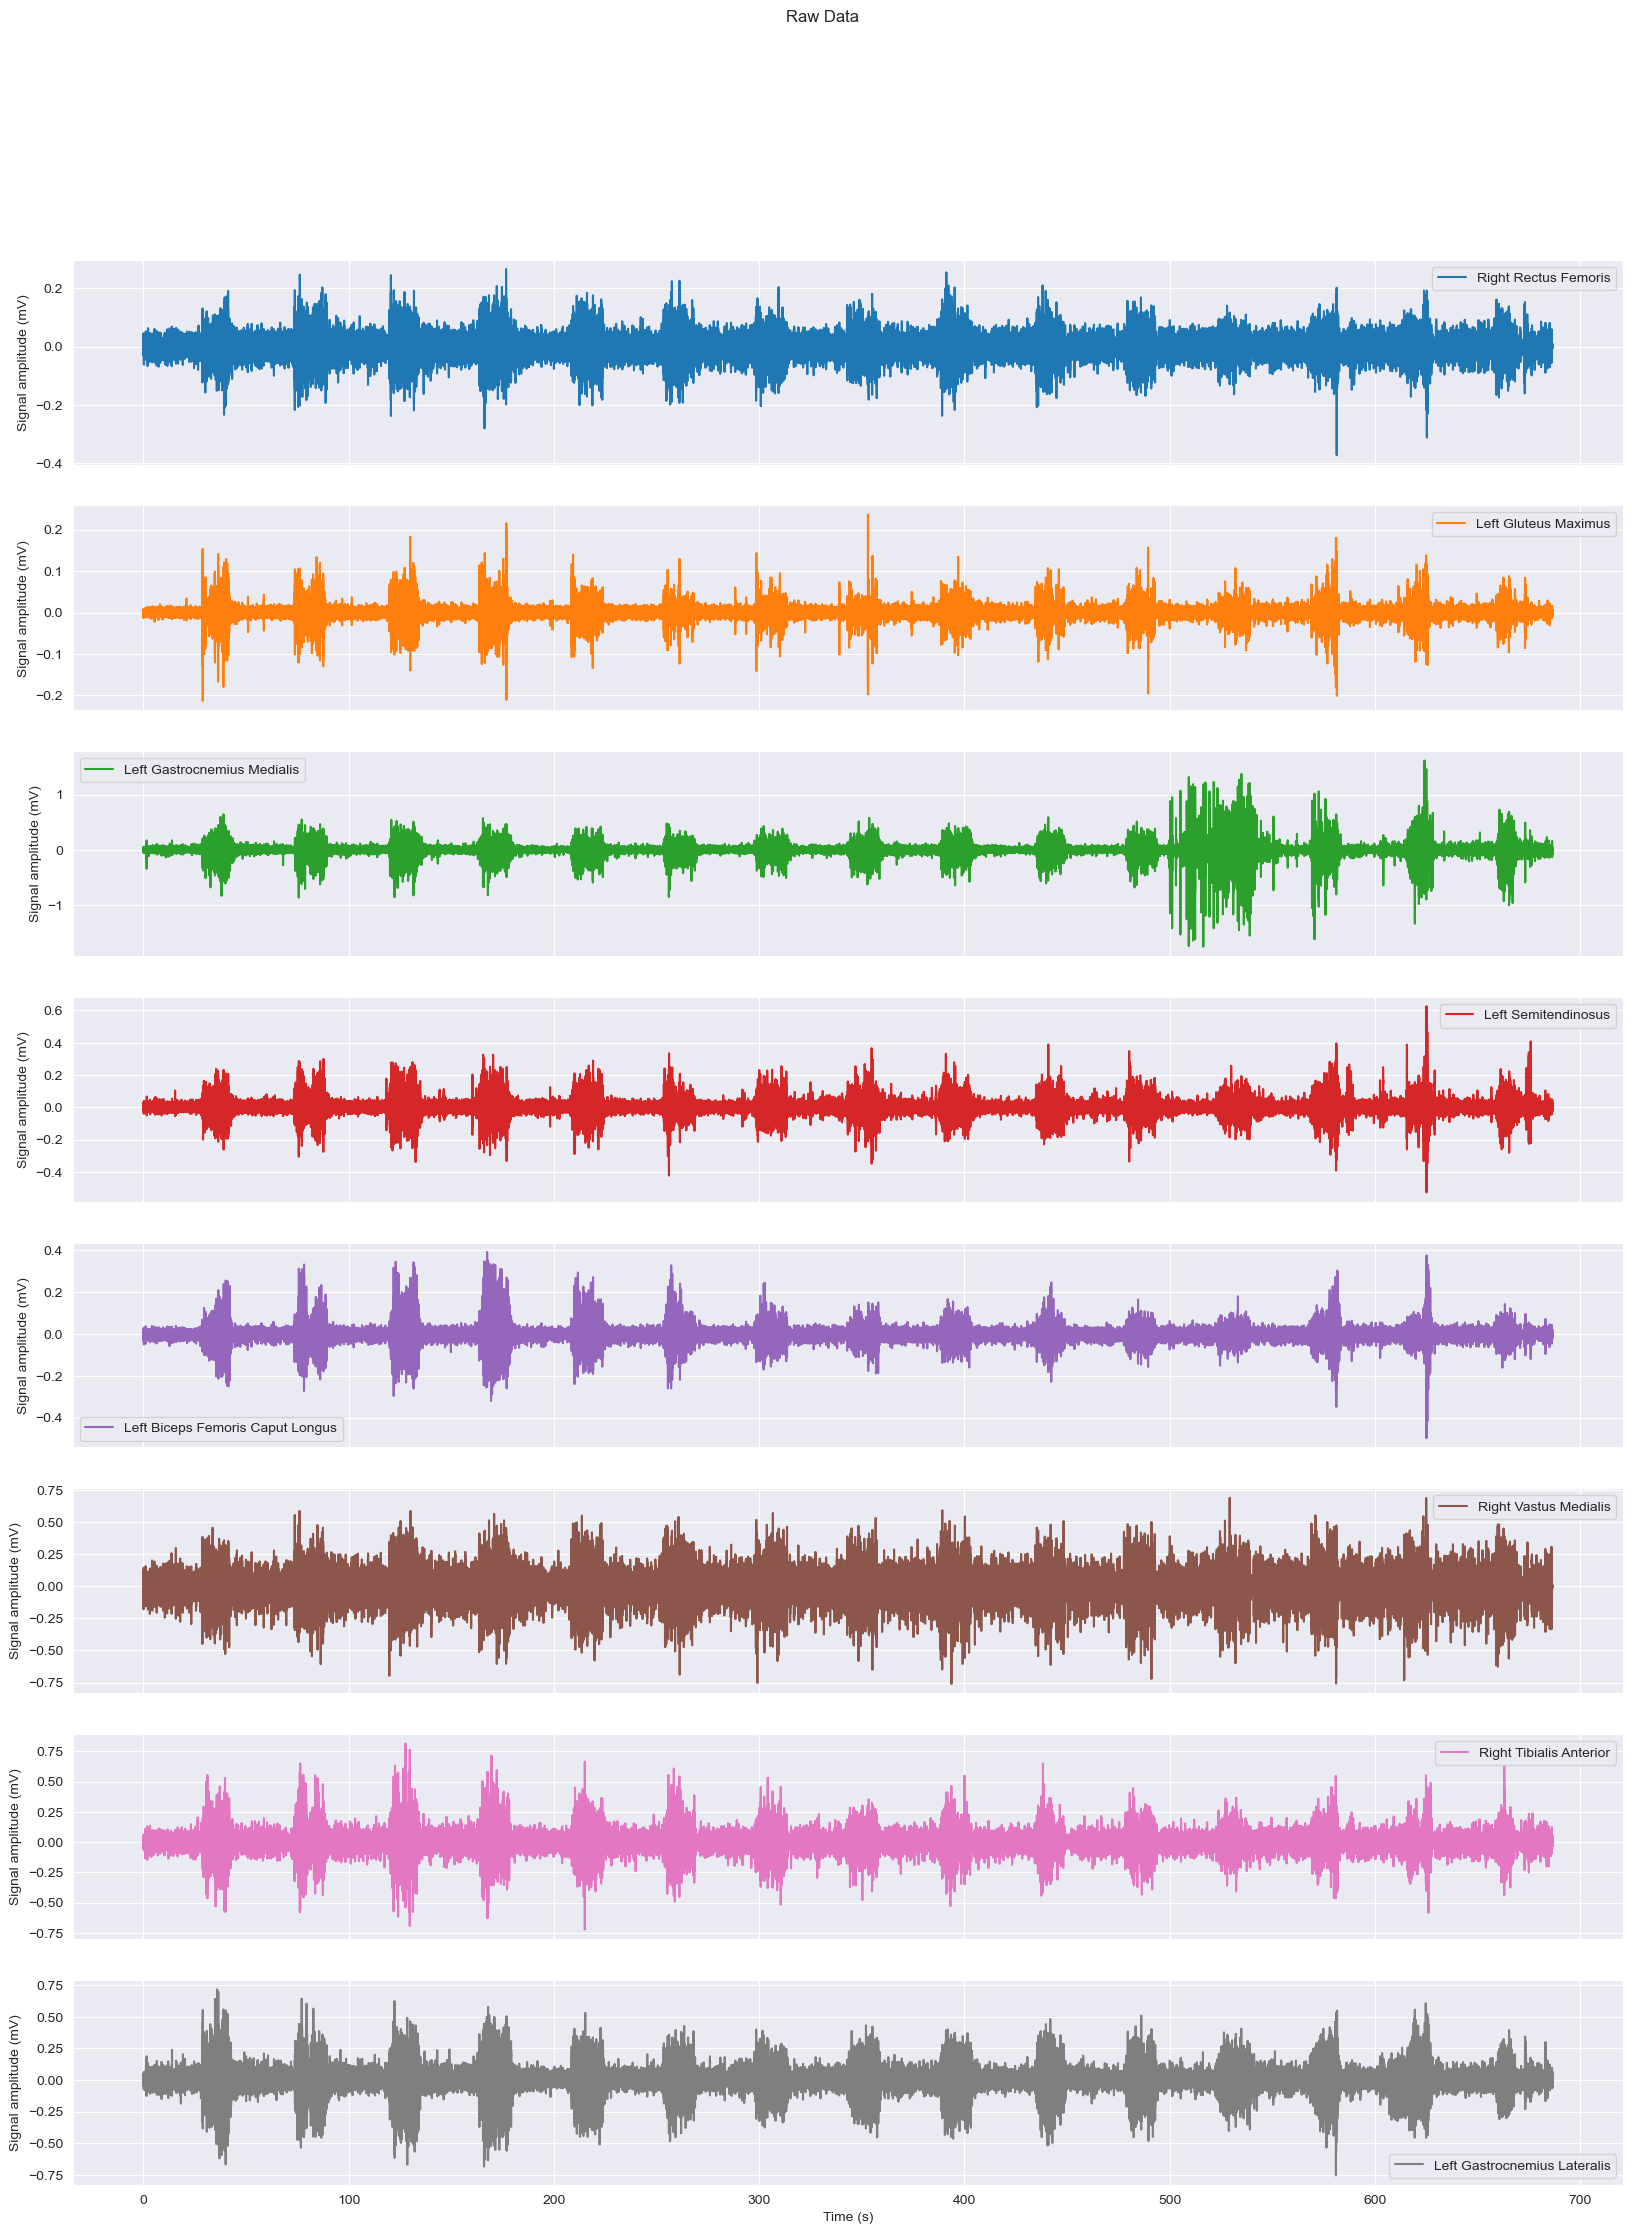

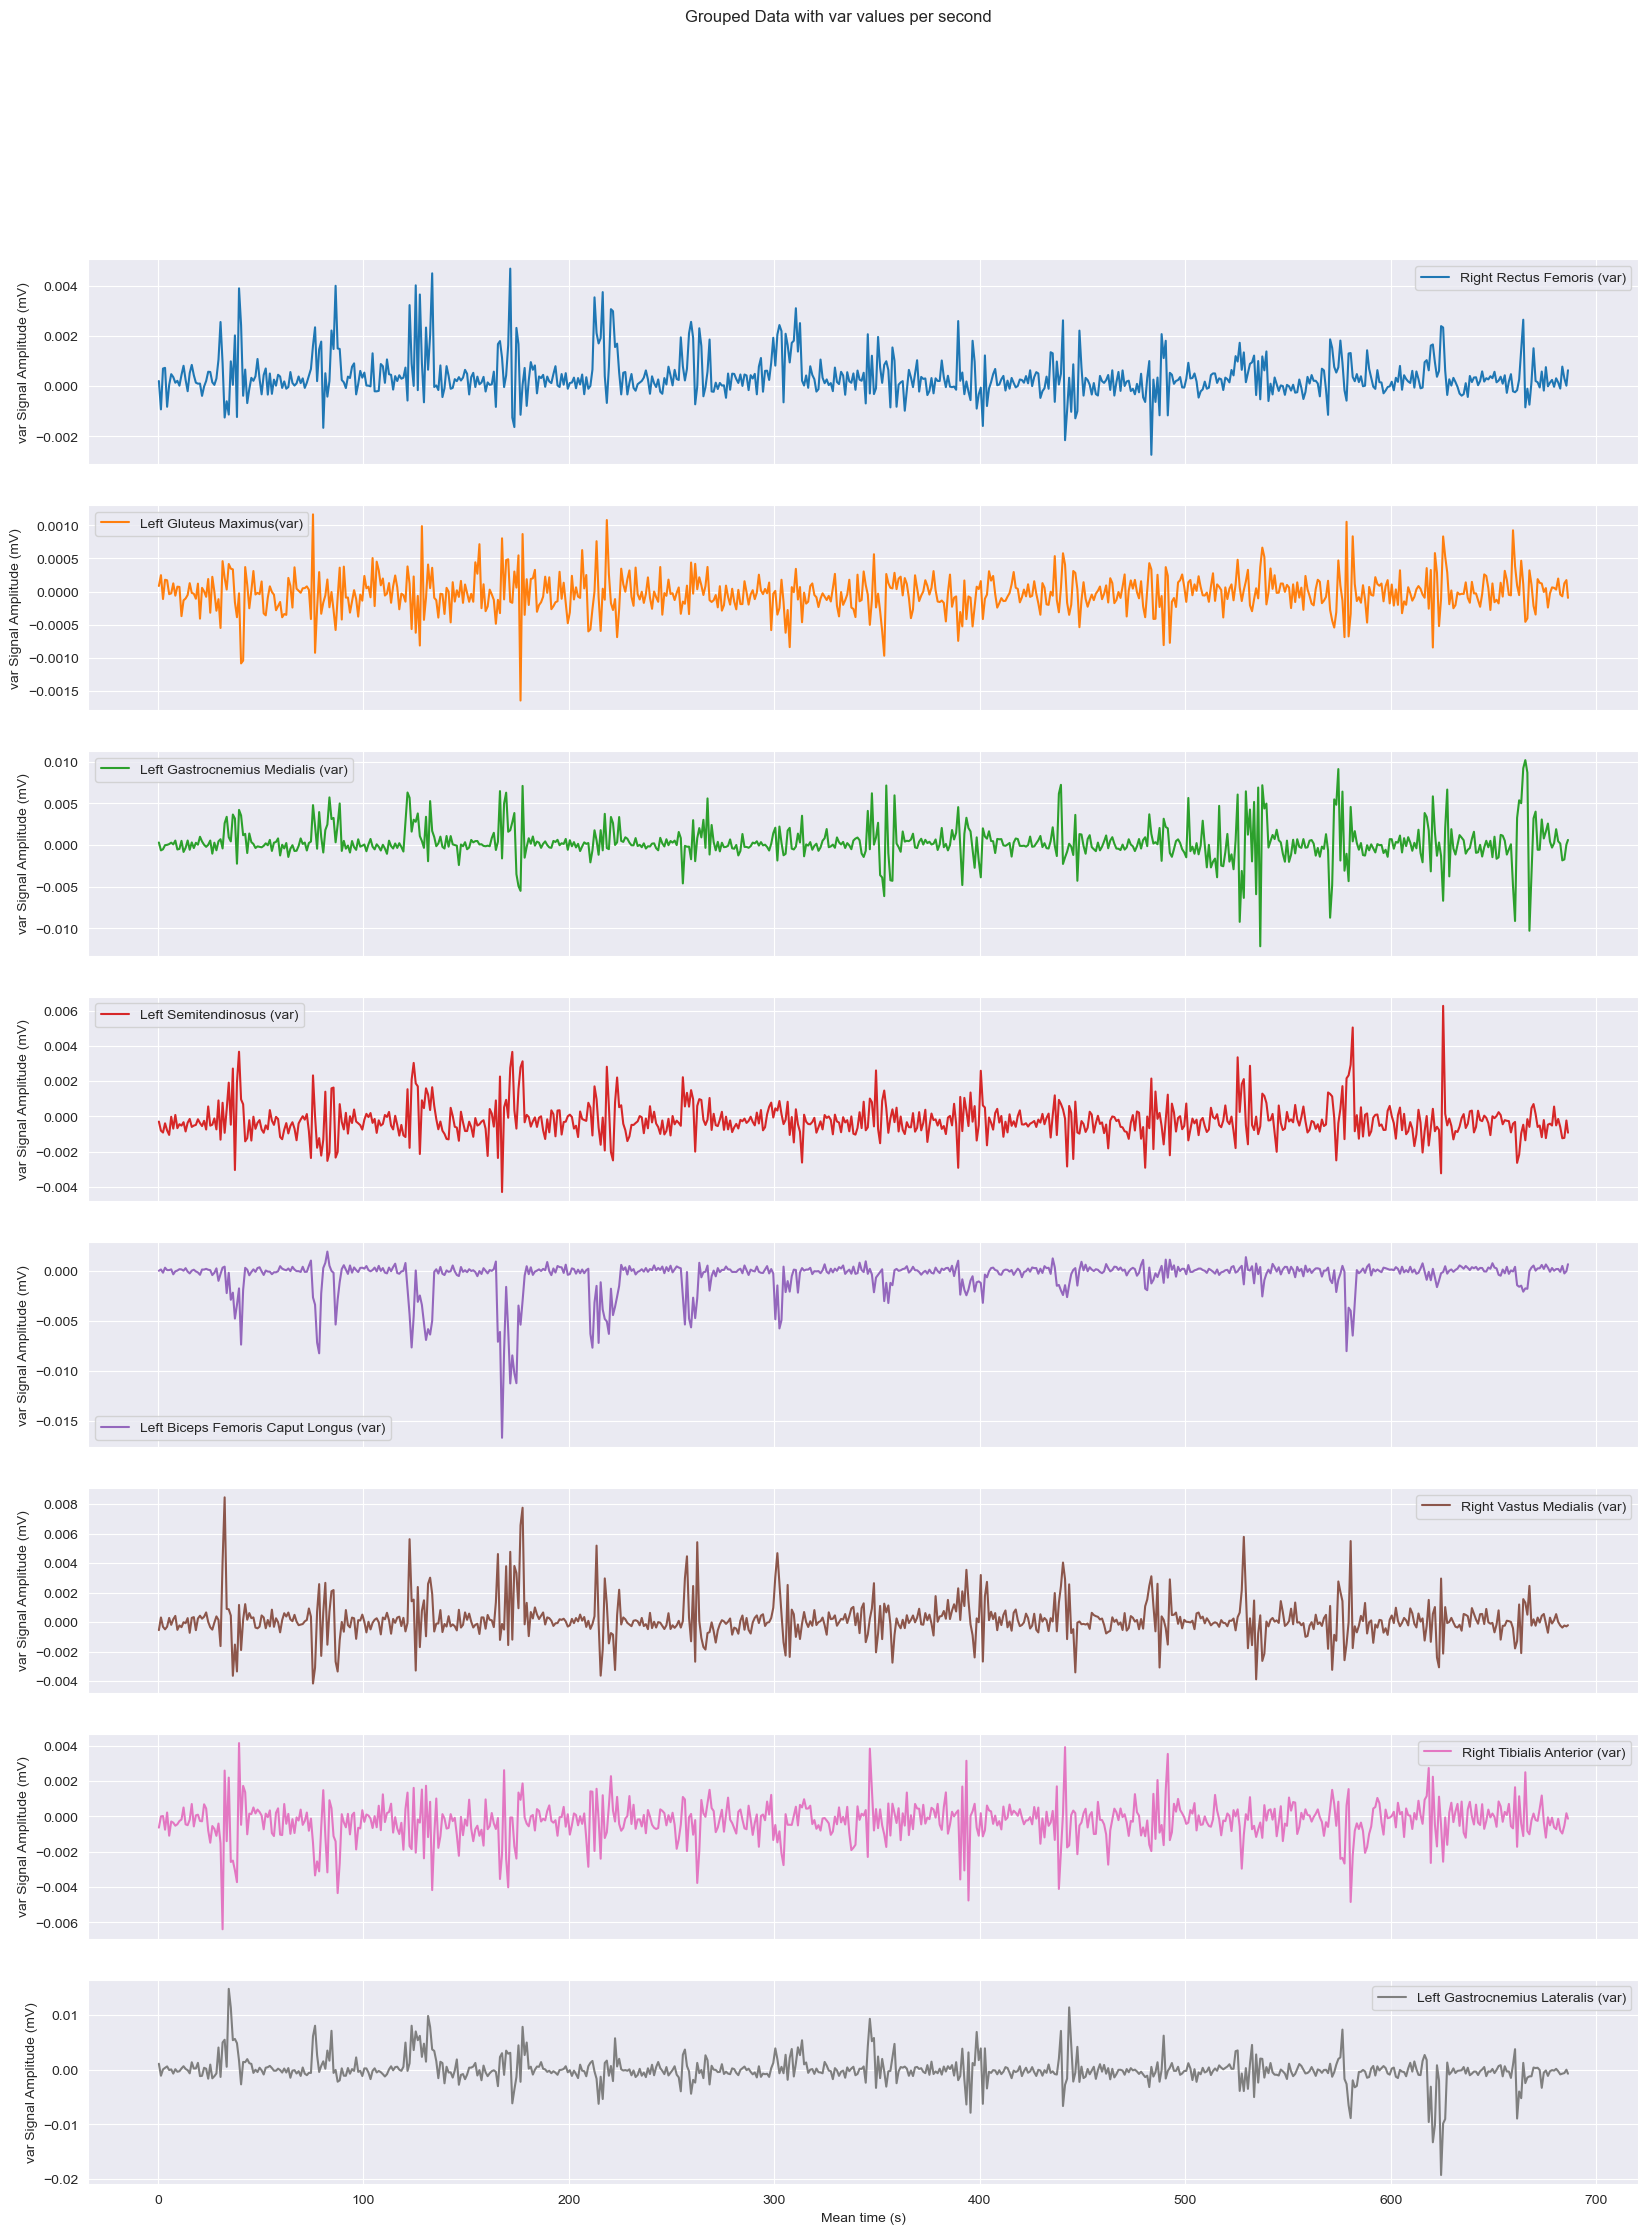

In [67]:
data_df.plot(x='Time', y=['Right Rectus Femoris', 'Left Gluteus Maximus', 'Left Gastrocnemius Medialis', 'Left Semitendinosus', 'Left Biceps Femoris Caput Longus', 'Right Vastus Medialis', 'Right Tibialis Anterior', 'Left Gastrocnemius Lateralis'], kind = 'line', figsize = (20, 25), subplots=True, layout=(8,1), xlabel = 'Time (s)',ylabel='Signal amplitude (mV)', title = 'Raw Data')

#plt.show()

df_var.plot(x = 'Time (var)', y = ['Right Rectus Femoris (var)', 'Left Gluteus Maximus(var)' , 'Left Gastrocnemius Medialis (var)', 'Left Semitendinosus (var)', 'Left Biceps Femoris Caput Longus (var)', 'Right Vastus Medialis (var)', 'Right Tibialis Anterior (var)', 'Left Gastrocnemius Lateralis (var)'], kind = 'line', figsize = (20, 25), subplots=True, layout=(8,1), xlabel = 'Mean time (s)', ylabel='var Signal Amplitude (mV)', title='Grouped Data with var values per second')
plt.show()

#Frequency Analysis with Fourier Transform

# Concatenating all dataframes

In [70]:
stats_df = pd.concat([df_mean, df_median, df_std, df_cov, df_var], axis=1)
stats_df

Time (mean)  Right Rectus Femoris (Mean)  Left Gluteus Maximus(Mean)  \
0         0.4995                     0.000045                1.923540e-05   
1         1.4995                    -0.000045               -1.810325e-06   
2         2.4995                     0.000136                1.489724e-06   
3         3.4995                     0.000080                1.984335e-06   
4         4.4995                    -0.000375               -2.246663e-05   
..           ...                          ...                         ...   
682     682.4995                     0.000003                2.906505e-05   
683     683.4995                    -0.000034                5.821844e-07   
684     684.4995                     0.000063                2.018275e-05   
685     685.4995                    -0.000028               -4.521857e-05   
686     686.2620                     0.000018                7.036150e-06   

     Left Gastrocnemius Medialis (Mean)  Left Semitendinosus (Mean)  \
0                             -0.000080                    0.000058   
1                              0.000053                   -0.000014   
2                              0.000276                   -0.000027   
3                             -0.000374                   -0.000012   
4                              0.000177                    0.000042   
..                                  ...                         ...   
682                            0.000350                    0.000132   
683                            0.000015                   -0.000226   
684                           -0.001522                    0.000203   
685                            0.000508                   -0.000068   
686                            0.001705                   -0.000159   

     Left Biceps Femoris Caput Longus (Mean)  Right Vastus Medialis (Mean)  \
0                                   0.000043                     -0.000021   
1                                   0.000021                      0.000021   
2                                  -0.000051                     -0.000115   
3                                  -0.000050                     -0.000027   
4                                   0.000037                      0.000161   
..                                       ...                           ...   
682                                -0.000010                      0.000235   
683                                -0.000065                      0.000332   
684                                 0.000192                     -0.000427   
685                                -0.000050                     -0.000071   
686                                -0.000094                      0.000076   

     Right Tibialis Anterior (Mean)  Left Gastrocnemius Lateralis (Mean)  \
0                     -2.840982e-05                             0.000211   
1                     -6.771324e-05                            -0.000340   
2                      5.225433e-05                             0.000093   
3                     -6.911869e-05                            -0.000227   
4                      1.295356e-04                            -0.000022   
..                              ...                                  ...   
682                   -2.749086e-07                            -0.000255   
683                   -1.195577e-04                             0.000593   
684                    8.383121e-05                            -0.000648   
685                   -4.443207e-05                             0.000172   
686                    9.654445e-05                            -0.000271   

     Target  ...  Time (var)  Right Rectus Femoris (var)  \
0       0.0  ...      0.4995                    0.000211   
1       0.0  ...      1.4995                   -0.000923   
2       0.0  ...      2.4995                    0.000710   
3       0.0  ...      3.4995                    0.000738   
4       0.0  ...      4.4995                   -0.000819   
..      ...  ... 

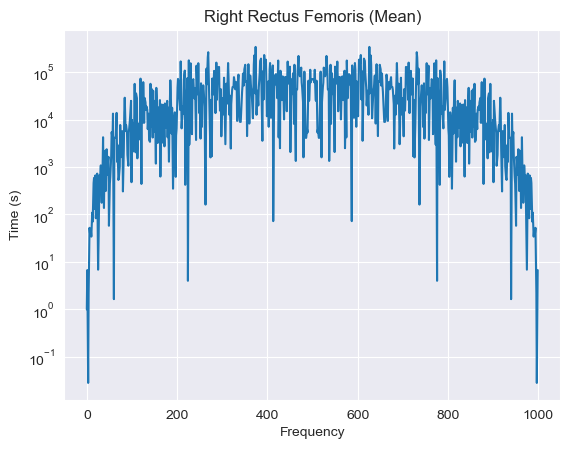

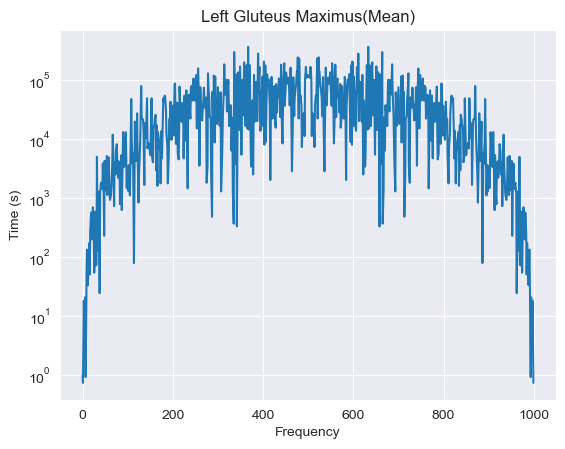

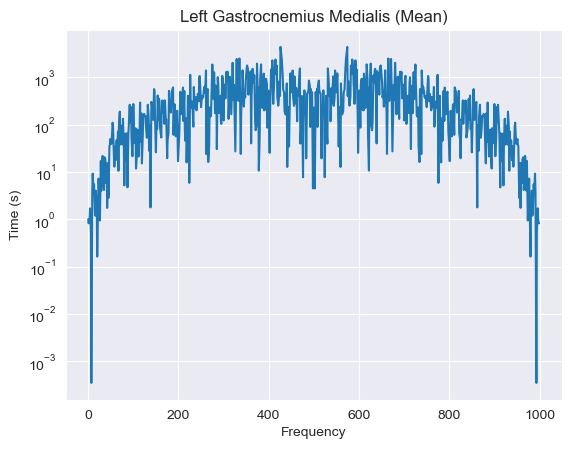

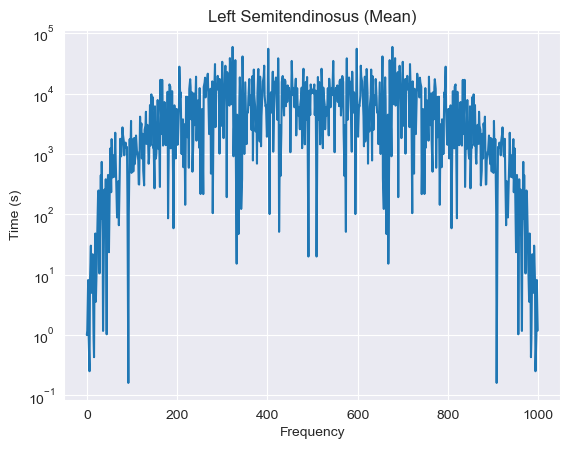

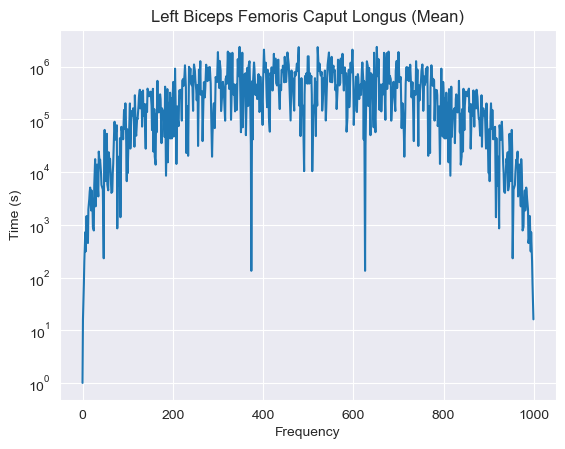

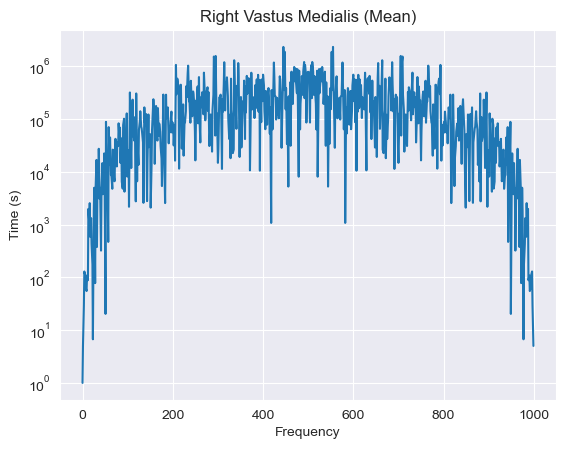

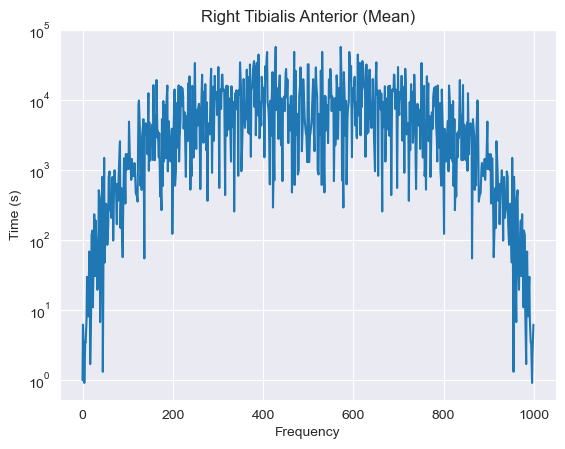

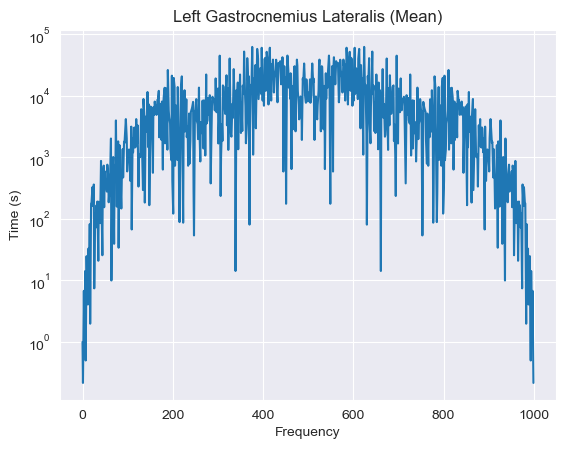

In [68]:
ch = ['Right Rectus Femoris (Mean)', 'Left Gluteus Maximus(Mean)' , 'Left Gastrocnemius Medialis (Mean)', 'Left Semitendinosus (Mean)', 'Left Biceps Femoris Caput Longus (Mean)', 'Right Vastus Medialis (Mean)', 'Right Tibialis Anterior (Mean)', 'Left Gastrocnemius Lateralis (Mean)']
for i in ch:
  x = list(range(len(df_mean)))
  y = df_mean[i]
  f = abs(np.fft.fft(y))
  num = np.size(x)
  frequency = [k/num for k in list(range(num))]
  spec = f.real*f.real+f.imag*f.imag
  nspec = spec/spec[0]
  results = pd.DataFrame({'freq':frequency, 'nspec': nspec})
  results['Time'] = results['freq']/(1/1000)
  results['period_round'] = results['Time'].round()
  grouped_time = results.groupby('period_round')['nspec'].sum()
  plt.figure()
  plt.semilogy(grouped_time.index, grouped_time)
  plt.title(i)
  plt.ylabel('Time (s)')
  plt.xlabel('Frequency')
  plt.show()




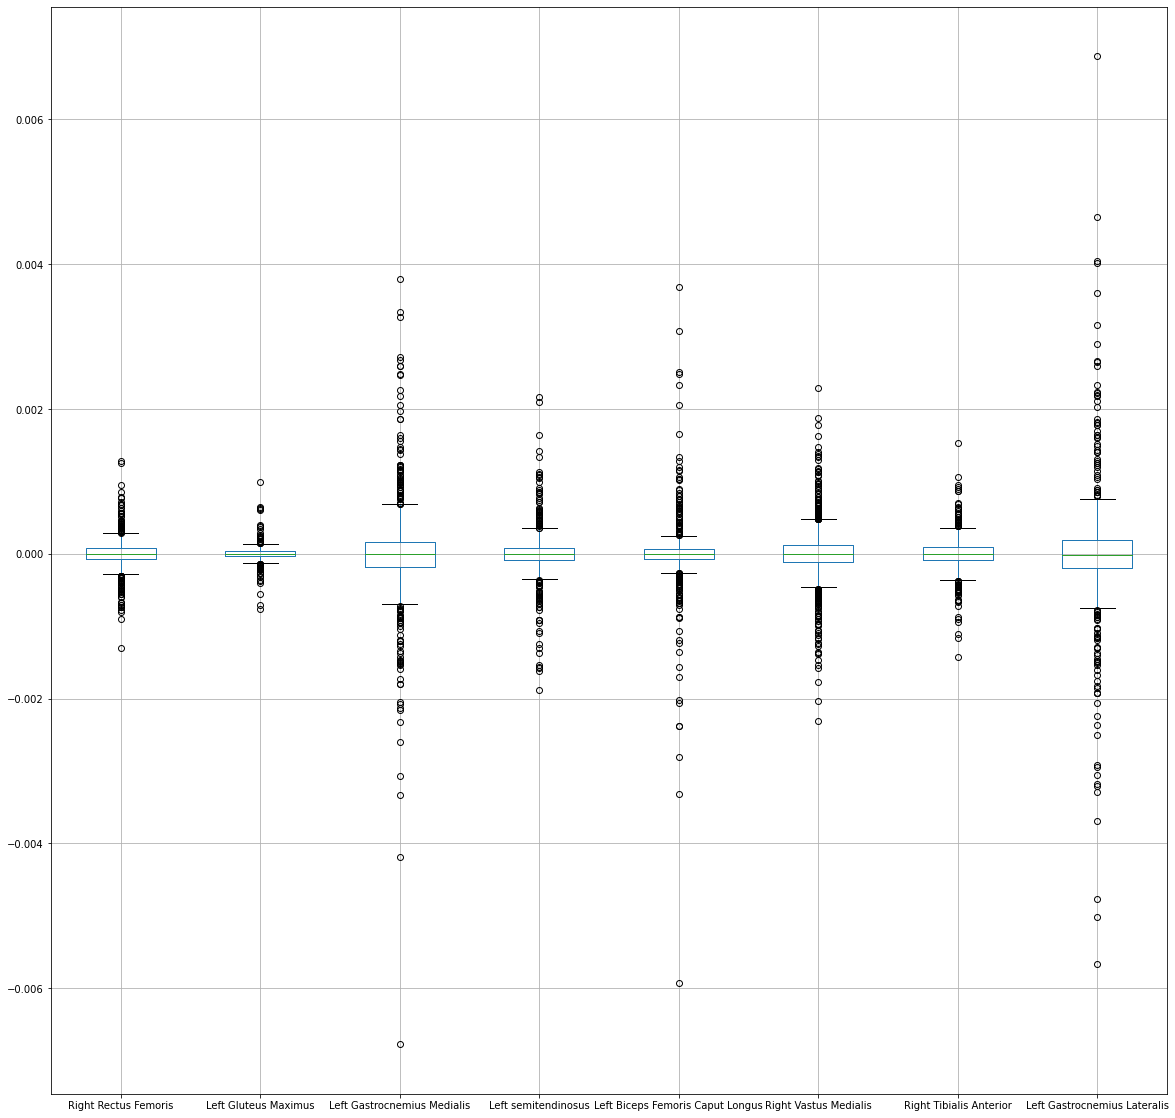

In [ ]:
plt.figure(figsize=(20,20))
df_mean.boxplot(column=['Right Rectus Femoris', 'Left Gluteus Maximus', 'Left Gastrocnemius Medialis', 'Left semitendinosus','Left Biceps Femoris Caput Longus',
                                     'Right Vastus Medialis', 'Right Tibialis Anterior', 'Left Gastrocnemius Lateralis'])
plt.show()

# Exploratory review of the Transformed DataFrame

In [ ]:
df_transformed.info()
df_transformed.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Time (s)                          686 non-null    float64
 1   Right Rectus Femoris              686 non-null    float64
 2   Left Gluteus Maximus              686 non-null    float64
 3   Left Gastrocnemius Medialis       686 non-null    float64
 4   Left semitendinosus               686 non-null    float64
 5   Left Biceps Femoris Caput Longus  686 non-null    float64
 6   Right Vastus Medialis             686 non-null    float64
 7   Right Tibialis Anterior           686 non-null    float64
 8   Left Gastrocnemius Lateralis      686 non-null    float64
 9   Target                            686 non-null    float64
dtypes: float64(10)
memory usage: 53.7 KB


Time (s)  Right Rectus Femoris  Left Gluteus Maximus  \
count  686.000000          6.860000e+02          6.860000e+02   
mean   342.999500          1.694008e-08          1.053954e-08   
std    198.175427          2.259300e-04          1.097972e-04   
min      0.499500         -1.294289e-03         -7.643195e-04   
25%    171.749500         -6.902880e-05         -3.643713e-05   
50%    342.999500         -2.086281e-06         -1.004502e-06   
75%    514.249500          7.422990e-05          3.442677e-05   
max    685.499500          1.287078e-03          9.941655e-04   

       Left Gastrocnemius Medialis  Left semitendinosus  \
count                 6.860000e+02         6.860000e+02   
mean                 -1.098141e-06         7.493875e-08   
std                   7.314310e-04         3.377751e-04   
min                  -6.776009e-03        -1.883376e-03   
25%                  -1.779321e-04        -9.071398e-05   
50%                  -2.630381e-07         3.318722e-06   
75%                   1.690460e-04         8.666879e-05   
max                   3.789816e-03         2.170257e-03   

       Left Biceps Femoris Caput Longus  Right Vastus Medialis  \
count                      6.860000e+02           6.860000e+02   
mean                       1.055782e-07          -7.402913e-08   
std                        5.062376e-04           4.566446e-04   
min                       -5.930728e-03          -2.315086e-03   
25%                       -6.825533e-05          -1.157371e-04   
50%                        3.211185e-06          -8.161386e-07   
75%                        6.178397e-05           1.217499e-04   
max                        3.680536e-03           2.288523e-03   

       Right Tibialis Anterior  Left Gastrocnemius Lateralis      Target  
count             6.860000e+02                  6.860000e+02  686.000000  
mean             -3.120647e-08                  4.637560e-08    0.300292  
std               2.449691e-04                  8.828549e-04    0.458719  
min              -1.425605e-03                 -5.670886e-03    0.000000  
25%              -9.159292e-05                 -1.919415e-04    0.000000  
50%              -5.323573e-06                 -1.461353e-05    0.000000  
75%               9.242184e-05                  1.913089e-04    1.000000  
max               1.524464e-03                  6.876155e-03    1.000000

# Parameter Selection through Feature Engineering techniques

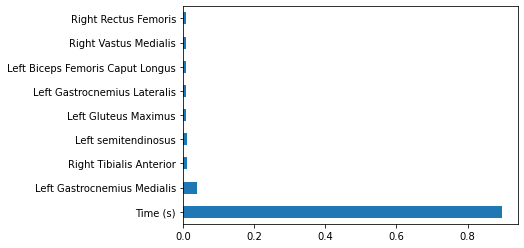

Time (s)                            0.896114
Left Gastrocnemius Medialis         0.040516
Right Tibialis Anterior             0.010839
Left semitendinosus                 0.010057
Left Gluteus Maximus                0.009647
Left Gastrocnemius Lateralis        0.009020
Left Biceps Femoris Caput Longus    0.008481
Right Vastus Medialis               0.007972
Right Rectus Femoris                0.007353
dtype: float64


In [ ]:
X = df_transformed.iloc[:, :-1]
y = df_transformed.iloc[:, -1]

model = RandomForestClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
print(feat_importances.nlargest(10))

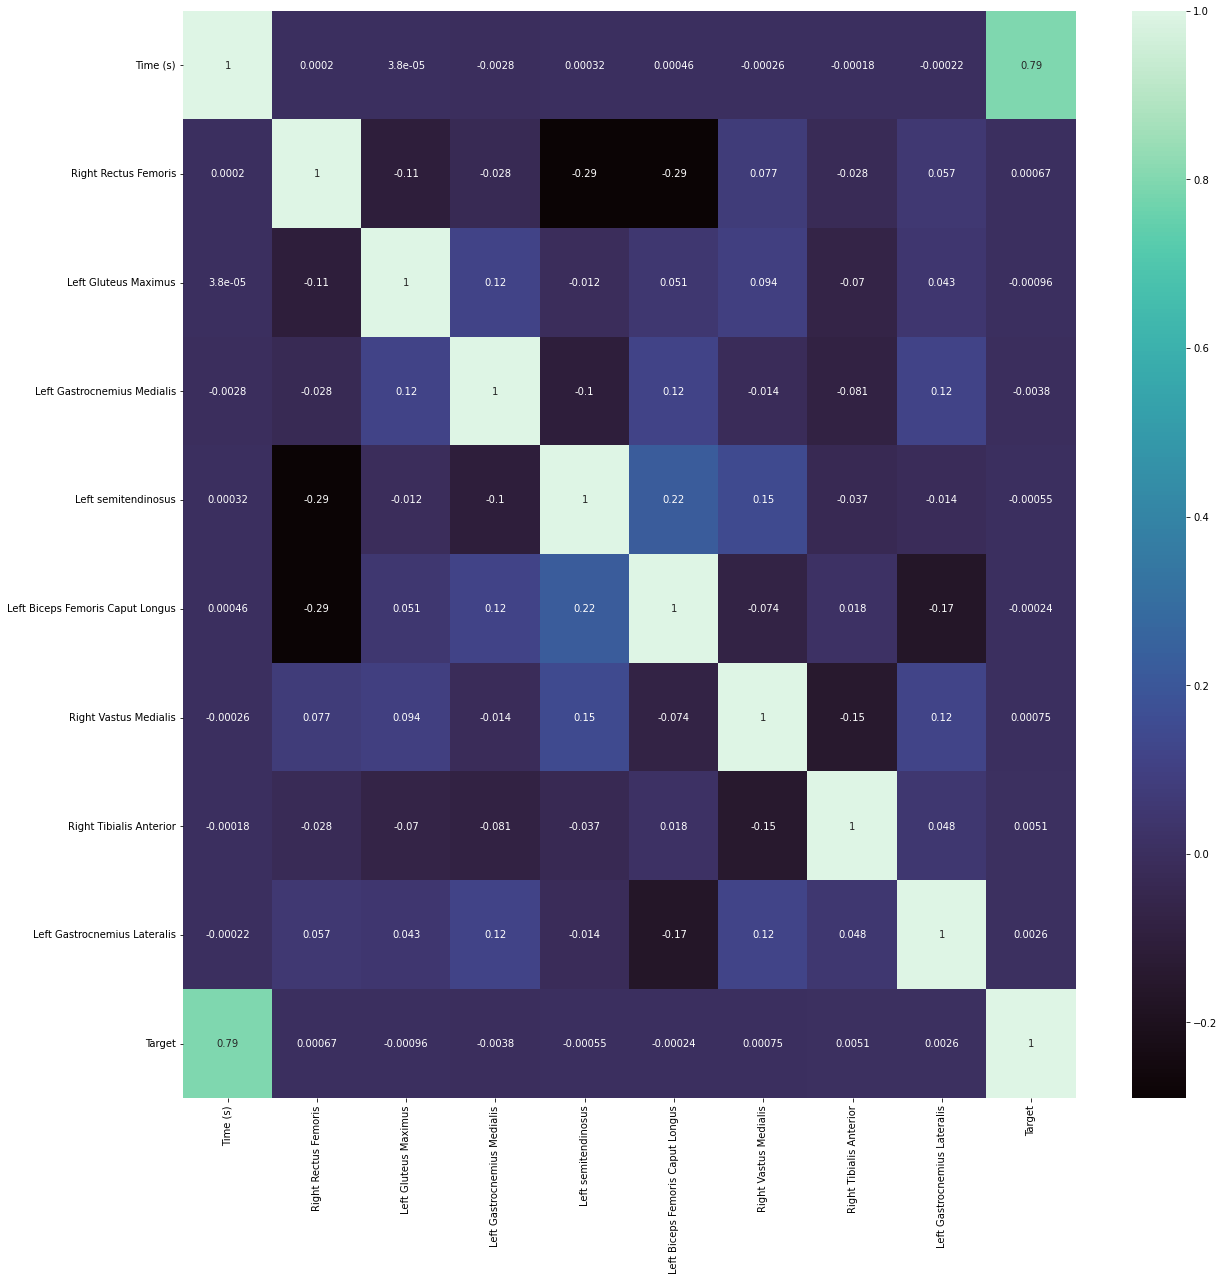

In [ ]:
# Matrix correlation:
plt.figure(figsize=(20,20))
sns.heatmap(data = df_transformed.corr(),annot=True,cmap="mako")
plt.show()


In [ ]:
#Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(df_transformed[['Time (s)', 'Left Gastrocnemius Medialis',
                                                                    'Right Vastus Medialis', 'Right Tibialis Anterior']], y, test_size = 0.85, random_state = 85, stratify=y)

#Let's check the shape of the training and test sets.

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(102, 4) (102,) (584, 4) (584,)


# Fare review of classification methods for EMG Dataset

Accuracy score test for 1 trees and criterion gini: 0.9297945205479452
Accuracy score train for 1 trees and criterion gini: 0.9607843137254902
Accuracy score test for 1 trees and criterion entropy: 0.9297945205479452
Accuracy score train for 1 trees and criterion entropy: 0.9607843137254902
Accuracy score test for 10 trees and criterion gini: 0.988013698630137
Accuracy score train for 10 trees and criterion gini: 1.0
Accuracy score test for 10 trees and criterion entropy: 0.988013698630137
Accuracy score train for 10 trees and criterion entropy: 1.0
Accuracy score test for 19 trees and criterion gini: 0.988013698630137
Accuracy score train for 19 trees and criterion gini: 1.0
Accuracy score test for 19 trees and criterion entropy: 0.988013698630137
Accuracy score train for 19 trees and criterion entropy: 1.0
Accuracy score test for 28 trees and criterion gini: 0.9914383561643836
Accuracy score train for 28 trees and criterion gini: 1.0
Accuracy score test for 28 trees and criterion ent

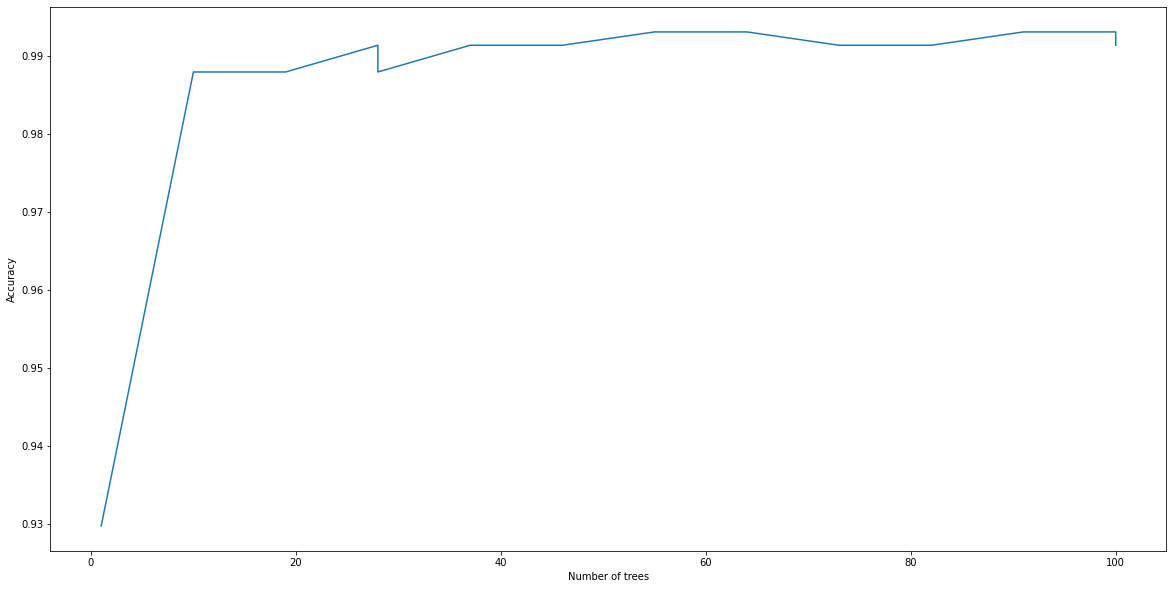

'The best accuracy score for test subset is: 0.9931506849315068 and the best for train subset is: 1.0 with number of trees: 55 and criterion gini'

In [ ]:
#Create a function that fit the model in a Random Forest Classifier and return the accuracy score.

def random_forest(X_train, y_train, X_test, y_test):
    global y_pred, best_trees, best_accuracy, best_criterion
    tree_num = []
    accuracy = []
    criterion = []
    for i in range(1, 109, 9):
        for j in ['gini', 'entropy']:
            rf = RandomForestClassifier(n_estimators=i, random_state=42, criterion=j, n_jobs=4)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            y_pred_train = rf.predict(X_train)
            a_s_test= accuracy_score(y_test, y_pred)
            a_s_train = accuracy_score(y_train, y_pred_train)
            print(f'Accuracy score test for {i} trees and criterion {j}: {a_s_test}')
            print(f'Accuracy score train for {i} trees and criterion {j}: {a_s_train}')
            tree_num.append(i)
            accuracy.append(accuracy_score(y_test, y_pred))
            #Save the best accuracy_score and the number of trees.3
            if i == 1:
                best_accuracy = a_s_test
                best_accuracy_train = a_s_train
                best_trees = i
                best_criterion = j
            elif accuracy_score(y_test, y_pred) > best_accuracy:
                best_accuracy = accuracy_score(y_test, y_pred)
                best_accuracy_train = accuracy_score(y_train, y_pred_train)
                best_trees = i
                best_criterion = j
    plt.figure(figsize=(20,10))
    plt.plot(tree_num, accuracy)
    plt.xlabel('Number of trees')
    plt.ylabel('Accuracy')
    plt.show()

    return f'The best accuracy score for test subset is: {best_accuracy} and the best for train subset is: {best_accuracy_train} with number of trees: {best_trees} and criterion {best_criterion}'

random_forest(X_train, y_train, X_test, y_test)

In [ ]:
def knn(X_train, y_train, X_test, y_test):
    global y_pred, best_k, best_accuracy, best_weight, best_p
    k = []
    accuracy = []
    for i in range(1, 20, 1):
        for j in ['uniform', 'distance']:
            for power in [1,2,3,4,5]:
                knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1, weights=j, p=power)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                y_pred_train = knn.predict(X_train)
                a_s_test= accuracy_score(y_test, y_pred)
                a_s_train = accuracy_score(y_train, y_pred_train)
                print(f'Accuracy score for {i} neighbors in test: {a_s_test} and for {i} neighbors in train: {a_s_train} weight {j} with a power of {power}')
                k.append(i)
                accuracy.append(accuracy_score(y_test, y_pred))
                #Save the best accuracy_score and the number of neighbors.
                if i == 1:
                    best_accuracy = a_s_test
                    best_accuracy_train = a_s_train
                    best_k = i
                    best_weight = j
                    best_p=power
                elif accuracy_score(y_test, y_pred) > best_accuracy:
                    best_accuracy = a_s_test
                    best_accuracy_train = a_s_train
                    best_k = i
                    best_weight = j
                    best_p = power
    
    plt.figure(figsize=(20,10))
    plt.plot(k, accuracy)
    plt.plot()
    plt.xlabel('Number of neighbors')
    plt.ylabel('Accuracy')
    plt.show()

    return f'The best accuracy score for test is: {best_accuracy}, for train is: {best_accuracy_train} and the best number of neighbors is: {best_k} with weight defined as {best_weight} with a power of {best_p}'

Accuracy score for 1 neighbors in test: 0.9965753424657534 and for 1 neighbors in train: 1.0 weight uniform with a power of 1
Accuracy score for 1 neighbors in test: 0.9965753424657534 and for 1 neighbors in train: 1.0 weight uniform with a power of 2
Accuracy score for 1 neighbors in test: 0.9965753424657534 and for 1 neighbors in train: 1.0 weight uniform with a power of 3
Accuracy score for 1 neighbors in test: 0.9965753424657534 and for 1 neighbors in train: 1.0 weight uniform with a power of 4
Accuracy score for 1 neighbors in test: 0.9965753424657534 and for 1 neighbors in train: 1.0 weight uniform with a power of 5
Accuracy score for 1 neighbors in test: 0.9965753424657534 and for 1 neighbors in train: 1.0 weight distance with a power of 1
Accuracy score for 1 neighbors in test: 0.9965753424657534 and for 1 neighbors in train: 1.0 weight distance with a power of 2
Accuracy score for 1 neighbors in test: 0.9965753424657534 and for 1 neighbors in train: 1.0 weight distance with a 

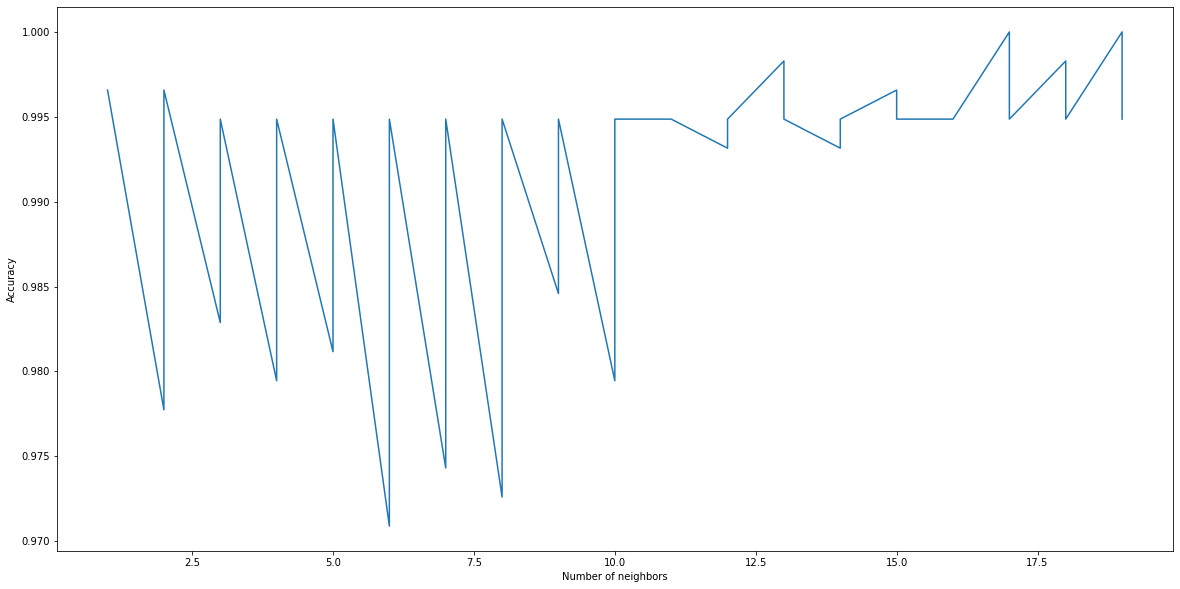

'The best accuracy score for test is: 1.0, for train is: 1.0 and the best number of neighbors is: 17 with weight defined as uniform with a power of 1'

In [ ]:
knn(X_train, y_train, X_test, y_test)

In [ ]:
def gamma_SVM(X_train, y_train, X_test, y_test):
    gamma = []
    accuracy = []
    for i in np.arange(0.1, 3, 0.5):
        for j in [0.1, 1, 10, 100]:
            model = SVC(random_state=None, kernel='rbf', C=j, gamma=i)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(f'Accuracy score for gamma {i} and C {j}: {accuracy_score(y_test, y_pred)}')
            gamma.append(i)
            accuracy.append(accuracy_score(y_test, y_pred))
    plt.figure(figsize=(20,10))
    plt.plot(gamma, accuracy)
    plt.xlabel('Gamma')
    plt.ylabel('Accuracy')
    plt.show()

    return f'The best accuracy score is: {max(accuracy)} and the best gamma is: {gamma[accuracy.index(max(accuracy))]} with C {j}'

Accuracy score for gamma 0.1 and C 0.1: 0.7003424657534246
Accuracy score for gamma 0.1 and C 1: 0.8373287671232876
Accuracy score for gamma 0.1 and C 10: 0.863013698630137
Accuracy score for gamma 0.1 and C 100: 0.863013698630137
Accuracy score for gamma 0.6 and C 0.1: 0.7003424657534246
Accuracy score for gamma 0.6 and C 1: 0.7722602739726028
Accuracy score for gamma 0.6 and C 10: 0.7722602739726028
Accuracy score for gamma 0.6 and C 100: 0.7722602739726028
Accuracy score for gamma 1.1 and C 0.1: 0.7003424657534246
Accuracy score for gamma 1.1 and C 1: 0.7071917808219178
Accuracy score for gamma 1.1 and C 10: 0.7551369863013698
Accuracy score for gamma 1.1 and C 100: 0.7551369863013698
Accuracy score for gamma 1.6 and C 0.1: 0.7003424657534246
Accuracy score for gamma 1.6 and C 1: 0.7003424657534246
Accuracy score for gamma 1.6 and C 10: 0.7071917808219178
Accuracy score for gamma 1.6 and C 100: 0.7071917808219178
Accuracy score for gamma 2.1 and C 0.1: 0.7003424657534246
Accuracy sc

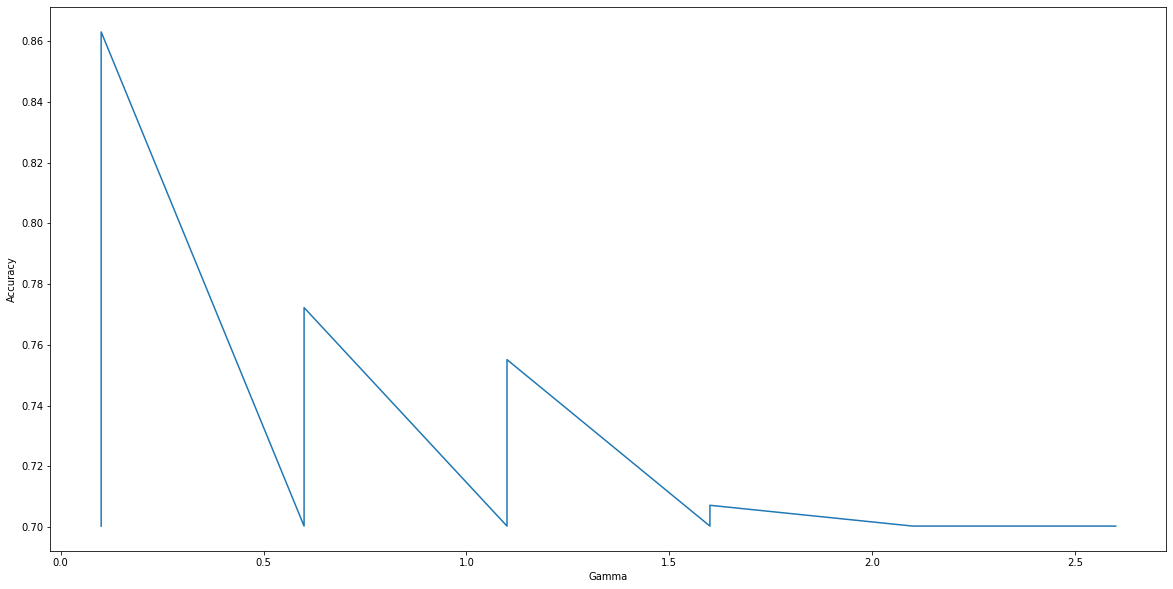

'The best accuracy score is: 0.863013698630137 and the best gamma is: 0.1 with C 100'

In [ ]:
gamma_SVM(X_train, y_train, X_test, y_test)

# Grid Search application to classifiers

In [ ]:
pipe = Pipeline([("classifier", KNeighborsClassifier())])
search_space = [
    {
        "classifier" : [LogisticRegression()],
        "classifier__penalty" : ['none', 'l1', 'l2', 'elasticnet'],
        "classifier__max_iter" : [i for i in range(1, 10000, 1000)],
        "classifier__n_jobs" : [1, 2, 3, 4, -1]
     },

     {
        "classifier" : [RandomForestClassifier()],
        "classifier__n_estimators" : [i for i in range(1,1000,100)],
        "classifier__criterion" : ['gini', 'entropy', 'log_loss'],
        "classifier__class_weight" : ['balanced', 'balanced_subsample']   
     },

     {
        "classifier" : [KNeighborsClassifier()],
        "classifier__n_neighbors" : [i for i in range(1, 20, 1)],
        "classifier__weights" : ['uniform', 'distance'],
        "classifier__algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        "classifier__p" : [1, 2]
     },

     {
        "classifier" : [NuSVC()],
        "classifier__nu" : [0.2, 0.4, 0.6, 0.8, 1],
        "classifier__kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
        "classifier__decision_function_shape" : ['ovo', 'ovr']
     },

     {
        "classifier" : [LinearSVC()],
        "classifier__penalty" : ['l1', 'l2'],
        "classifier__loss" : ['hinge', 'squared_hinge'],
        "classifier__multi_class" : ['ovr', 'crammer_singer'],
        "classifier__max_iter" : [i for i in range(1, 5000, 200)]
     },

     {
        "classifier" : [SVC()],
        "classifier__kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
        "classifier__gamma" : ['scale', 'auto']
     }
]

In [ ]:
#GridSearch:

classif = GridSearchCV(pipe, search_space, cv=15, verbose=0, n_jobs=-1)
best_clf=classif.fit(X_train, y_train)
print(f'El mejor modelo es: {best_clf.best_estimator_.get_params()["classifier"]}')

El mejor modelo es: KNeighborsClassifier(n_neighbors=9, p=1)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2798 fits failed out of a total of 12180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)